In [28]:
import matplotlib.pyplot as plt
import numpy as np

from aart_func import *
from params import * # The file params.py contains all the relevant parameters for the simulations
from astropy import units as u
import kgeo
import image_tools as tls
import subprocess
import scipy.interpolate
from matplotlib import ticker
%load_ext autoreload
%autoreload 2
import importlib 
from functools import partial

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Computation of the lensing bands

In [2]:
%time !python3 lensingbands.py


Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Computing the lensing bands
Number of points in the n=0 grid  62500
Number of points in the n=1 grid  62500
Number of points in the n=2 grid  62500
File  /home/tej/Desktop/Code_Stuff/Repositories/aart_results/path_results/LensingBands_a_0.001_i_1.h5  created.
CPU times: user 263 ms, sys: 109 ms, total: 372 ms
Wall time: 30.4 s


In [22]:
rez = "low_rez/"
path_sub = "../aart_results/"
image_path = path_sub + "images/" + rez

In [10]:
path

'../aart_results/path_results/'

In [23]:
image_path


'../aart_results/images/low_rez/'

In [2]:
# fnbands="./Results/LensingBands_a_%s_i_%s.h5"%(spin_case,i_case)
fnbands= path + "LensingBands_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnbands)

h5f = h5py.File(fnbands,'r')

#Points for the boundary of the BH shadow
alpha_critc=h5f['alpha'][:]
beta_critc=h5f['beta'][:]

#The concave hulls for the lensing bands
hull_0i=h5f['hull_0i'][:]
hull_0e=h5f['hull_0e'][:]
hull_1i=h5f['hull_1i'][:]
hull_1e=h5f['hull_1e'][:]
hull_2i=h5f['hull_2i'][:]
hull_2e=h5f['hull_2e'][:]

#The grid points for each lensing band
supergrid0=h5f['grid0'][:]
N0=int(h5f["N0"][0])
mask0=h5f['mask0'][:]
lim0=int(h5f["lim0"][0])
supergrid1=h5f['grid1'][:]
N1=int(h5f["N1"][0])
mask1=h5f['mask1'][:]
lim1=int(h5f["lim1"][0])
supergrid2=h5f['grid2'][:]
N2=int(h5f["N2"][0])
mask2=h5f['mask2'][:]
lim2=int(h5f["lim2"][0])

h5f.close()

Reading file:  /home/tej/Desktop/Code_Stuff/Repositories/aart_results/path_results/LensingBands_a_0.001_i_1.h5


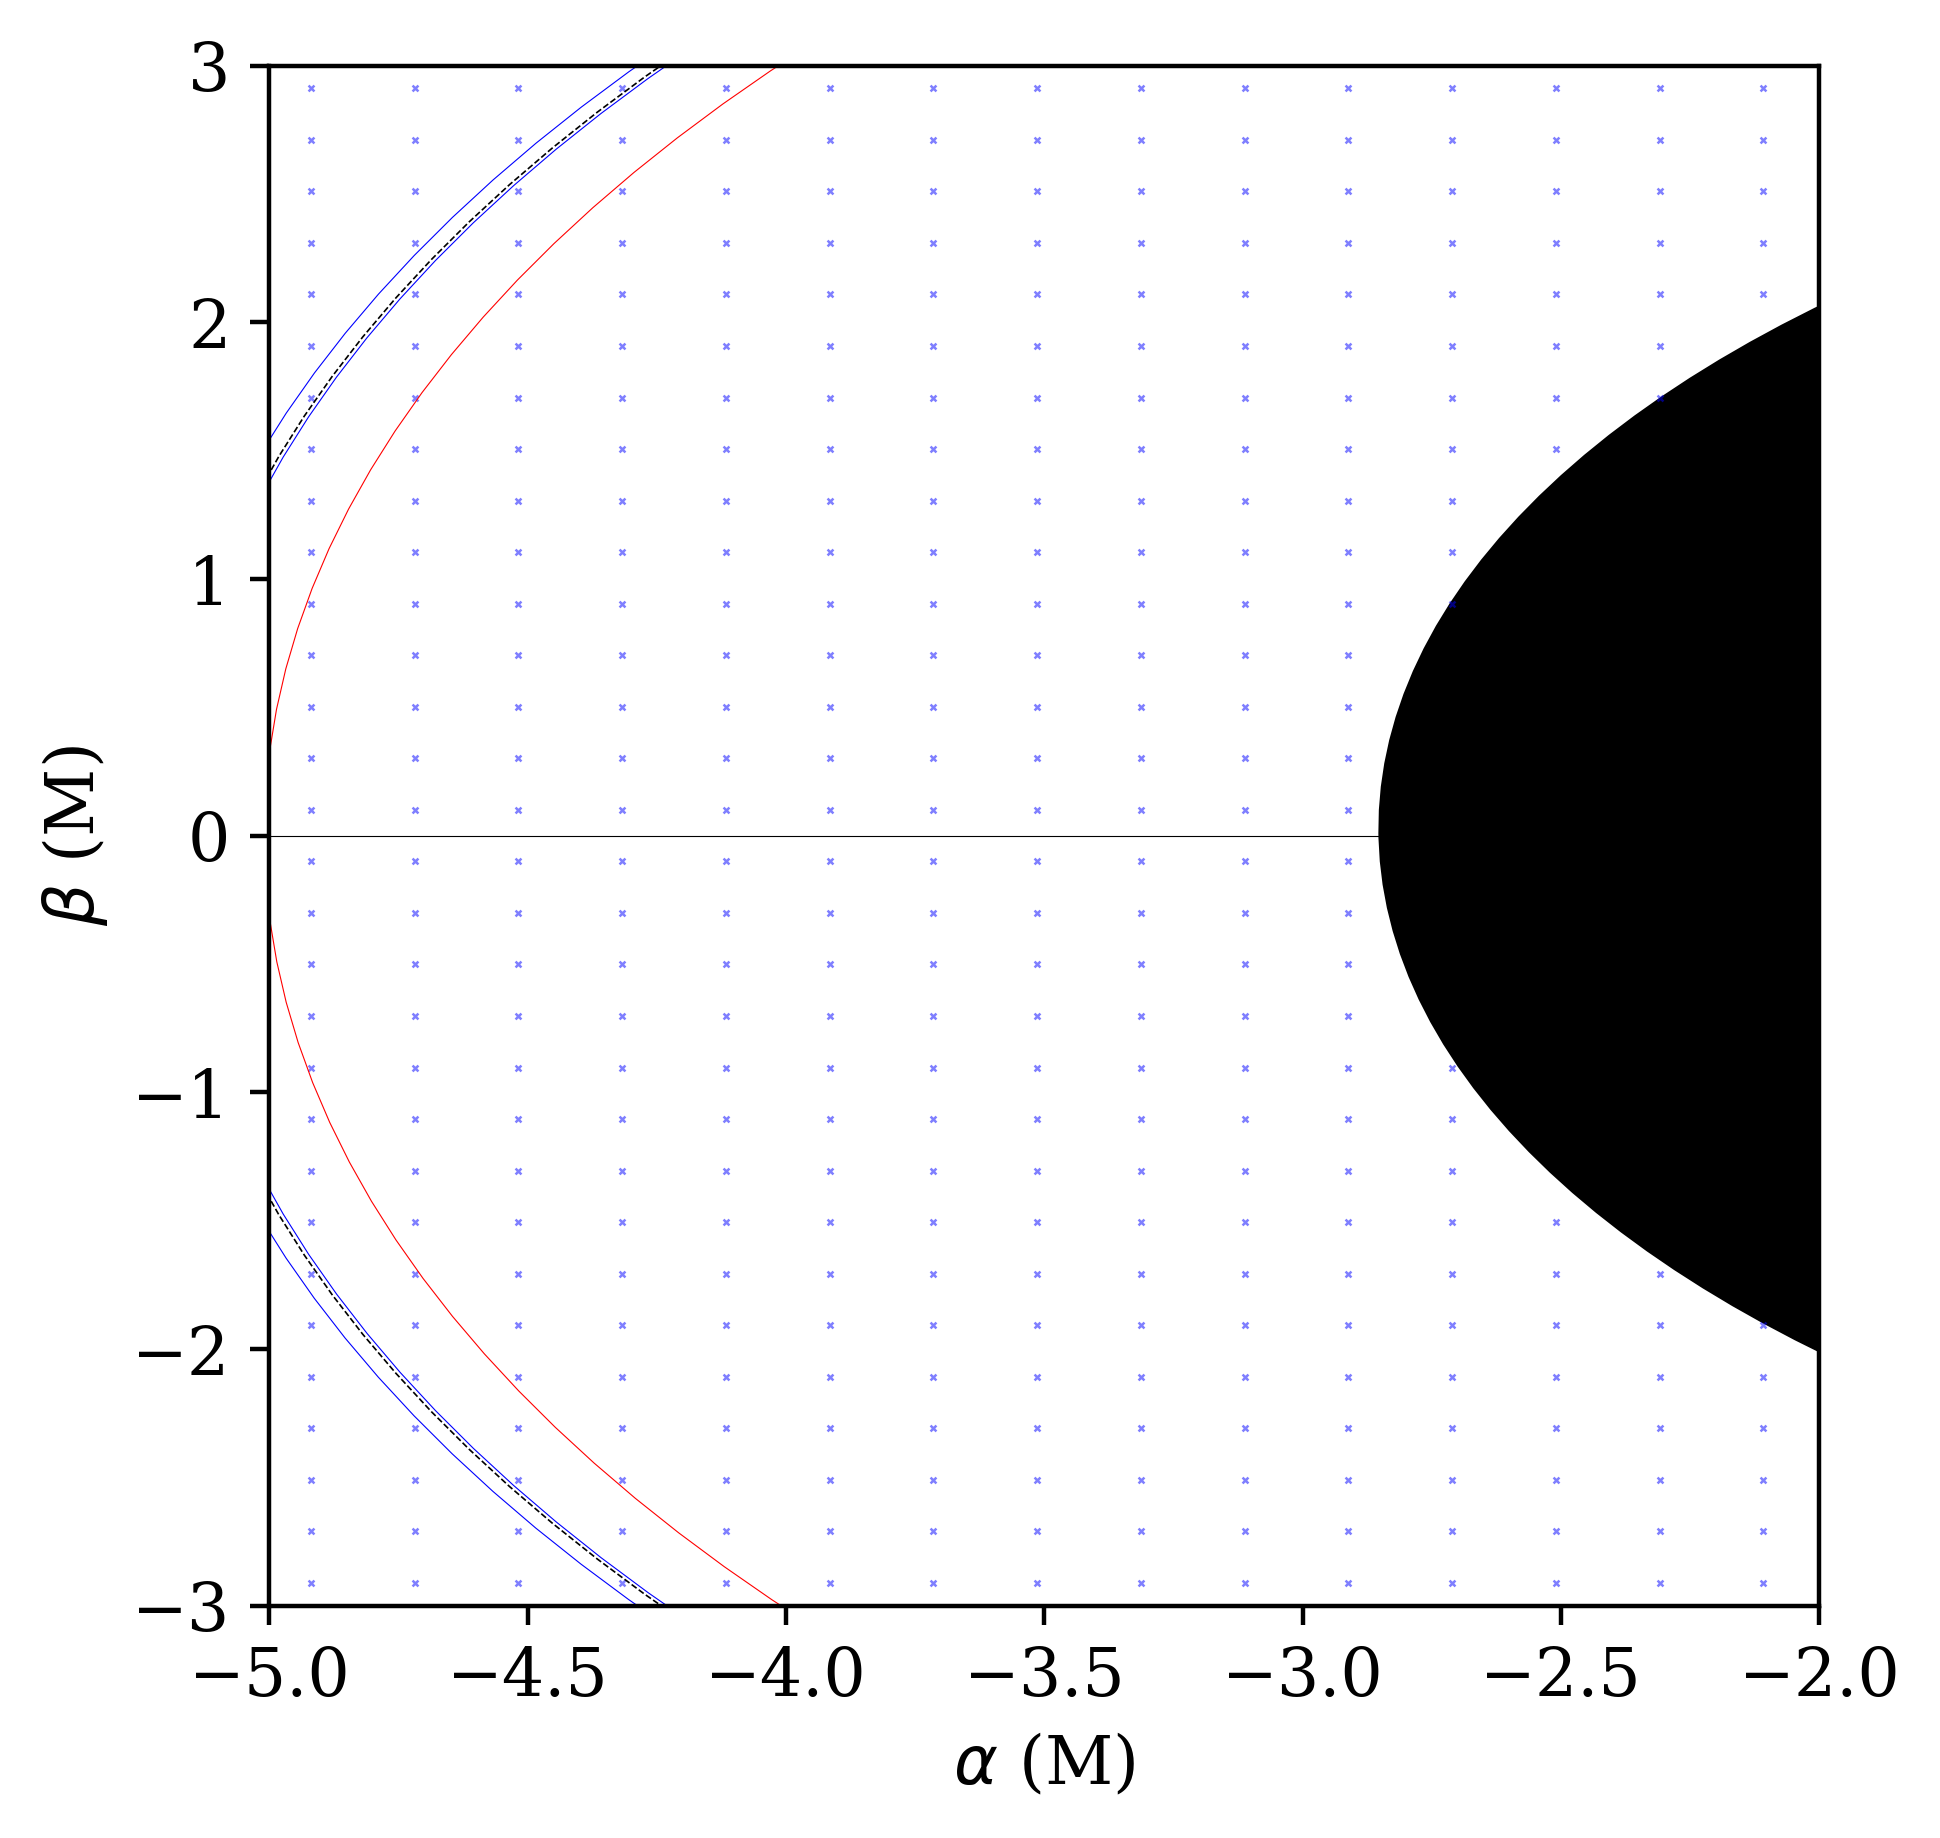

In [5]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.axvline(0,color="k",linewidth=0.2)
ax.axhline(0,color="k",linewidth=0.2)

ax.plot(alpha_critc,beta_critc,color="k",linewidth=0.3,linestyle="--")
ax.plot(alpha_critc,-beta_critc,color="k",linewidth=0.3,linestyle="--")

ax.fill(hull_0i[:,0],hull_0i[:,1],color="k")
ax.plot(hull_1i[:,0],hull_1i[:,1],'r',linewidth=0.2)
ax.plot(hull_1e[:,0],hull_1e[:,1],'r',linewidth=0.2)
ax.plot(hull_2i[:,0],hull_2i[:,1],'b',linewidth=0.2)
ax.plot(hull_2e[:,0],hull_2e[:,1],'b',linewidth=0.2)

#Plotting the grid points of the n=1 lensing band
# ax.scatter(supergrid1[:,0][mask1],supergrid1[:,1][mask1],color="r",marker=".",s=.1,alpha=0.5)
ax.scatter(supergrid0[:,0][mask0],supergrid0[:,1][mask0],color="b",marker="x",s=.1,alpha=0.5)
# ax.scatter(supergrid2[:,0][mask2],supergrid2[:,1][mask2],color="c",marker="+",s=.1,alpha=0.5)

# ax.set_xlim(-12,12)
# ax.set_ylim(-12,12)
ax.set_xlim(-5,-2)
ax.set_ylim(-3,3)

ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")

#plt.savefig('LB.png',dpi=400,bbox_inches='tight')

plt.show()

# Analytical Ray-tracing

In [6]:
%time !python3 raytracing.py



Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Ray-tracing
Reading file:  /home/tej/Desktop/Code_Stuff/Repositories/aart_results/path_results/LensingBands_a_0.001_i_1.h5
Analytical ray-tracing of the n=0 band points
Analytical ray-tracing of the n=1 band points
Analytical ray-tracing of the n=2 band points
File  /home/tej/Desktop/Code_Stuff/Repositories/aart_results/path_results/Rays_a_0.001_i_1.h5  created.

A total of 187500 photons were ray-traced
CPU times: user 38.8 ms, sys: 41.2 ms, total: 79.9 ms
Wall time: 2.95 s


In [3]:
# fnrays="./Results/Rays_a_%s_i_%s.h5"%(spin_case,i_case)
fnrays= path + "Rays_a_%s_i_%s.h5"%(spin_case,i_case)

print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

rs0=h5f['rs0'][:]
sign0=h5f['sign0'][:]
t0=h5f['t0'][:]
phi0=h5f['phi0'][:]

rs1=h5f['rs1'][:]
sign1=h5f['sign1'][:]
t1=h5f['t1'][:]
phi1=h5f['phi1'][:]

rs2=h5f['rs2'][:]
sign2=h5f['sign2'][:]
t2=h5f['t2'][:]
phi2=h5f['phi2'][:]


h5f.close()

Reading file:  /home/tej/Desktop/Code_Stuff/Repositories/aart_results/path_results/Rays_a_0.001_i_1.h5


## Plotting the $r$ and $\phi$ values of the n=0 band

Text(0, 0.5, '$\\beta$ (M)')

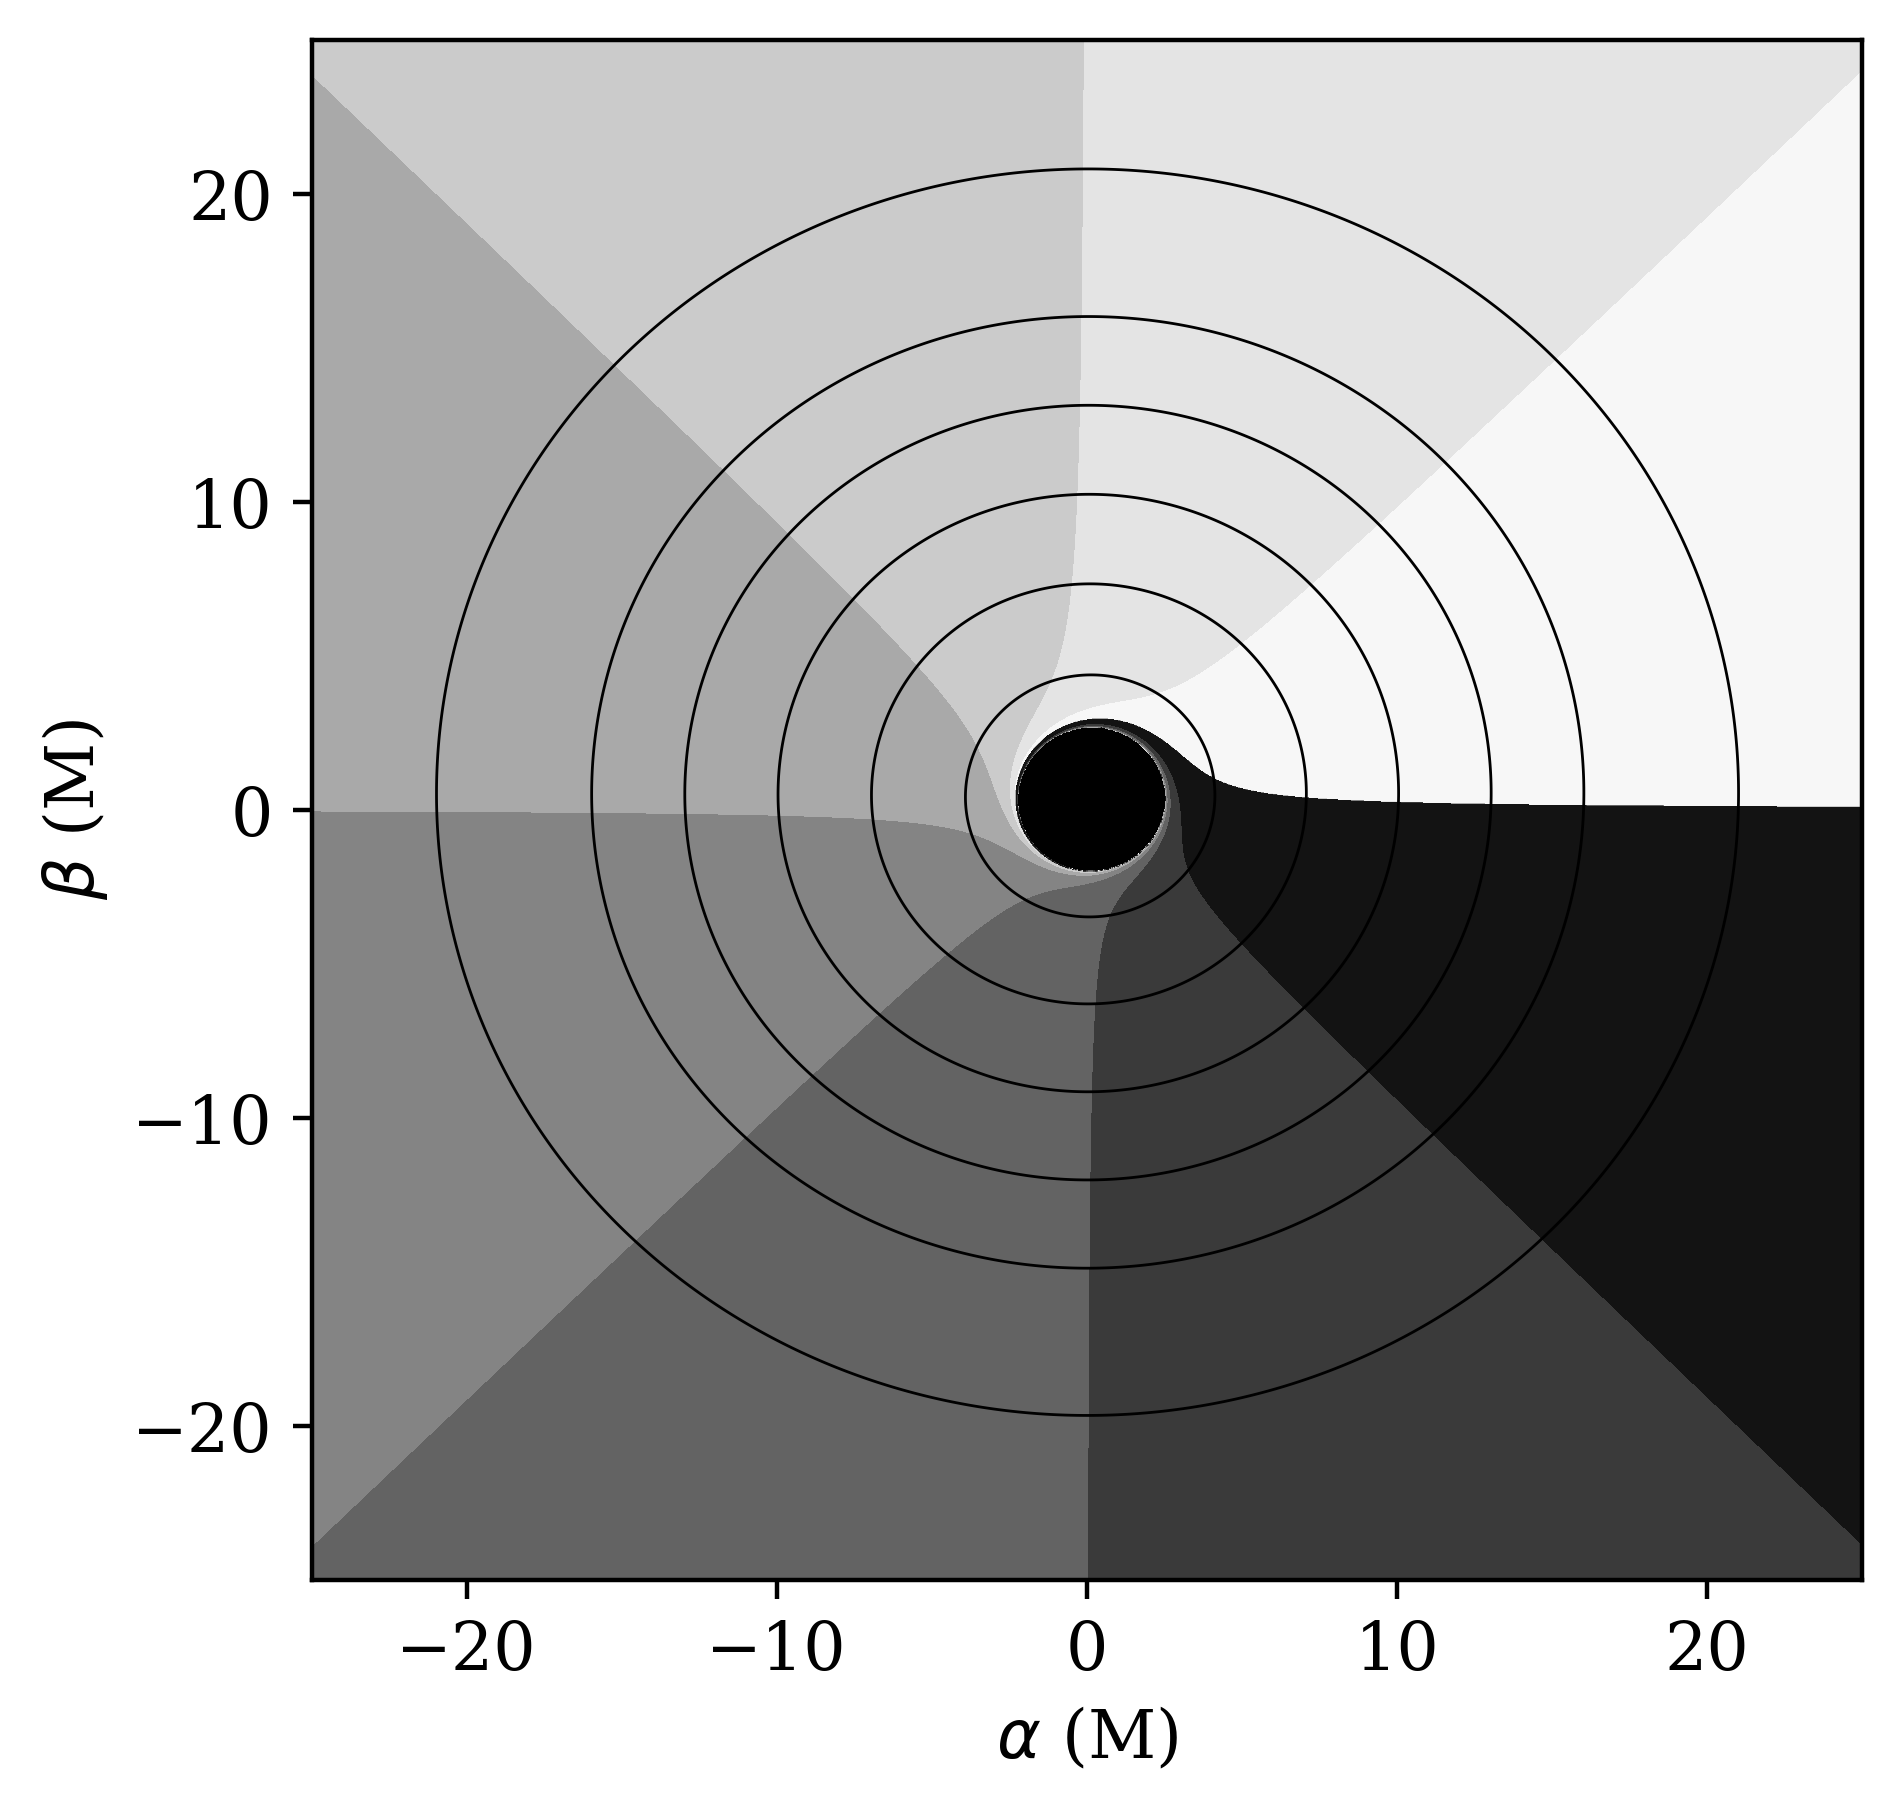

In [117]:
fig, ax = plt.subplots(figsize=[5,5],dpi=400)

ax.fill(hull_0i[:,0],hull_0i[:,1],color="k",linewidth=1,zorder=0)
        
CSphi=ax.contourf(phi0.reshape(N0,N0).T%(2*np.pi),cmap="Greys",levels=np.linspace(0,2*np.pi,9),extent=[-lim0,lim0,-lim0,lim0],origin="lower")
CSr=ax.contour(rs0.reshape(N0,N0).T,levels=[3,6,9,12,15,20],extent=[-lim0,lim0,-lim0,lim0],origin="lower",linewidths=0.5,colors='k')

ax.set_xlim(-lim0,lim0)
ax.set_ylim(-lim0,lim0)

ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")

#plt.savefig('Rays.png',dpi=400,bbox_inches='tight')

# Computing images

In [4]:

args = ' '
cmd1_args = {
   	"nu0" : '--nu ',
	"mass" : '--mass ',
	"scale_height" : '--scaleh ',
	"theta_b" : '--thetab ',
	"beta" : '--beta ',
    "r_ie" : '--rie ',
	"rb_0" : '--rb0 ',
	"n_th0" : '--nth0 ',
	"t_e0" : '--te0 ',
	"p_dens" : '--pdens ',
	"p_temp" : '--ptemp ',
    "nscale" : '--nscale ',
}

cmd2_args = {
	"emodelkey" : '--emodelkey ',
    "bkey" : '--bkey ',
    "nnoisykey" : '--nnoisykey ',
    "tnoisykey" : '--tnoisykey ',
    "bnoisykey" : '--bnoisykey ',
}
# brightparams = [
# 	230e9, # nu0
# 	(MMkg * u.kg).to(u.g).value, # mass
# 	.5, # scale_height
# 	50.0 * (np.pi / 180), # theta_b
# 	1.0, # beta
# 	10.0, # Rie
# 	0, # Bchoice
# 	2, # rb
# 	1.0726e+05, # n_th0
# 	1.2428e+11, # t_e0
# 	-.7, # p_dens
# 	-.84 # p_temp
# ]
brightparams = {
	"nu0" : 230e9, # 0 nu0
	"mass" : (MMkg * u.kg).to(u.g).value, # 1 mass
	"scale_height" : .5, # 2 scale_height
	"theta_b" : 50.0 * (np.pi / 180), # 3 theta_b
	"beta" : 1.0, # 4 beta
	"r_ie" : 10.0, # 5 rie
	"rb_0" : 2, # 7 rb_0
	"n_th0" : 2e5, #,4e5 # 8 n_th0
	"t_e0" : 2e11, # 9 t_e0 1e12
	"p_dens" : -.7, # 10 p_dens
	"p_temp" : -.84, # 11 p_temp
    "nscale" : .4 # Scale of Inoisy
}

funckeys = {
		"emodelkey" : 0, # emodelkey Emission Model choice, 0 = thermal ultrarelativistic, 1 = power law
        "bkey" : 0, # bkey
        "nnoisykey" : 1, # nnoisykey Inoisy density. 0 = no noise, 1 = noise
        "tnoisykey" : 0, # tnoisykey Inoisy temperature
        "bnoisykey" : 1# bnoisykey Inoisy magnetic field
}


for arg in cmd1_args:
    args = args + cmd1_args[arg] + str(brightparams[arg]) + ' ' 

for arg in cmd2_args:
    args = args + cmd2_args[arg] + str(funckeys[arg]) + ' ' 
    
# for i in range(len(brightparams)):
#     args = args + cmd1_args[i] + str(brightparams[i]) + ' '
aartpath = '/home/tej/Desktop/Code_Stuff/Repositories/aart'

In [30]:
subprocess.run(['python3 ' + aartpath + '/radialintensity.py' + args], shell=True)



Thanks for using AART
Copyright (C) 2022, A. Cardenas-Avendano, H. Zhu & A. Lupsasca

Reading file:  /home/tej/Desktop/Code_Stuff/Repositories/aart_results/path_results/Rays_a_0.001_i_1.h5
Intensity
Reading file:  /home/tej/Desktop/Code_Stuff/Repositories/aart_results/path_results/LensingBands_a_0.001_i_1.h5
Reading file:  /home/tej/Desktop/Code_Stuff/Repositories/aart_results/path_results/Rays_a_0.001_i_1.h5
File  /home/tej/Desktop/Code_Stuff/Repositories/aart_results/path_results/Intensity_a_0.001_i_1_nu_2.30000e+11_mass_1.32497e+43_scaleh_0.5_thetab_0.873_beta_1.00_rie_10.0_rb_2.0_nth0_2.0e+05_te0_2.0e+11_pdens_-0.7_ptemp_-0.84_nscale_0.4_emkey_0_bkey_0_nkey_1_tnkey_0_bnkey_1.h5  created.


CompletedProcess(args=['python3 /home/tej/Desktop/Code_Stuff/Repositories/aart/radialintensity.py --nu 230000000000.0 --mass 1.3249659172847406e+43 --scaleh 0.5 --thetab 0.8726646259971648 --beta 1.0 --rie 10.0 --rb0 2 --nth0 200000.0 --te0 200000000000.0 --pdens -0.7 --ptemp -0.84 --nscale 0.4 --emodelkey 0 --bkey 0 --nnoisykey 1 --tnoisykey 0 --bnoisykey 1 '], returncode=0)

In [31]:
# TODO: modify name
# fnrays='./Results/Intensity_a_{}|i_{}|nu_{}|mass_{}|scaleh_{}|thetab_{}|beta_{}|rie_{}|rb_{}|nth0_{}|te0_{}|pdens_{}|ptemp_{}|nscale_{}|emkey_{}|bkey_{}|nkey_{}|tnke
fnrays= path + 'Intensity_a_{}_i_{}_nu_{}_mass_{}_scaleh_{}_thetab_{}_beta_{}_rie_{}_rb_{}_nth0_{}_te0_{}_pdens_{}_ptemp_{}_nscale_{}_emkey_{}_bkey_{}_nkey_{}_tnkey_{}_bnkey_{}.h5'.format(
    spin_case,
    i_case,
    "{:.5e}".format(brightparams["nu0"]),
    "{:.5e}".format(brightparams["mass"]), 
    float(brightparams["scale_height"]),
    "{:.3f}".format(brightparams["theta_b"]), 
    "{:.2f}".format(float(brightparams["beta"])),
    "{:.1f}".format(float(brightparams["r_ie"])), 
    "{:.1f}".format(float(brightparams["rb_0"])),
    "{:.1e}".format(brightparams["n_th0"]),
    "{:.1e}".format(brightparams["t_e0"]),
    float(brightparams["p_dens"]),
    float(brightparams["p_temp"]),
    "{:.1f}".format(brightparams["nscale"]),
    funckeys["emodelkey"],
    funckeys["bkey"],
    funckeys["nnoisykey"],
    funckeys["tnoisykey"],
    funckeys["bnoisykey"]
    )
    
print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

I0=h5f['bghts0'][:] # This implies I0 is 1 pass
I1=h5f['bghts1'][:]
I2=h5f['bghts2'][:]

I2_Absorb = h5f['bghts2_absorbtion'][:]
I1_Absorb = h5f['bghts1_absorbtion'][:]
I0_Absorb = h5f['bghts0_absorbtion'][:]
Absorbtion_Image =h5f['bghts_full_absorbtion'][:]
tau2 = h5f['tau2'][:]
tau1 = h5f['tau1'][:]
tau0 = h5f['tau0'][:]
full_profiles0 = h5f['full_profiles0'][:]
full_profiles1 = h5f['full_profiles1'][:]
full_profiles2 = h5f['full_profiles2'][:]
full_profiles_unit = h5f['full_profiles_unit'][:]

cosAng2 = h5f['cosAngReturn2'][:]
cosAng1 = h5f['cosAngReturn1'][:]
cosAng0 = h5f['cosAngReturn0'][:]


testa0 = h5f['testa0'][:]
testb0 = h5f['testb0'][:]
eta0 = h5f['eta0'][:]

h5f.close()



Reading file:  /home/tej/Desktop/Code_Stuff/Repositories/aart_results/path_results/Intensity_a_0.001_i_1_nu_2.30000e+11_mass_1.32497e+43_scaleh_0.5_thetab_0.873_beta_1.00_rie_10.0_rb_2.0_nth0_2.0e+05_te0_2.0e+11_pdens_-0.7_ptemp_-0.84_nscale_0.4_emkey_0_bkey_0_nkey_1_tnkey_0_bnkey_1.h5


In [23]:
full_profiles_unit[3].decode('UTF-8')
for i in range (len(full_profiles_unit)):
    full_profiles_unit[i] = full_profiles_unit[i].decode('UTF-8')

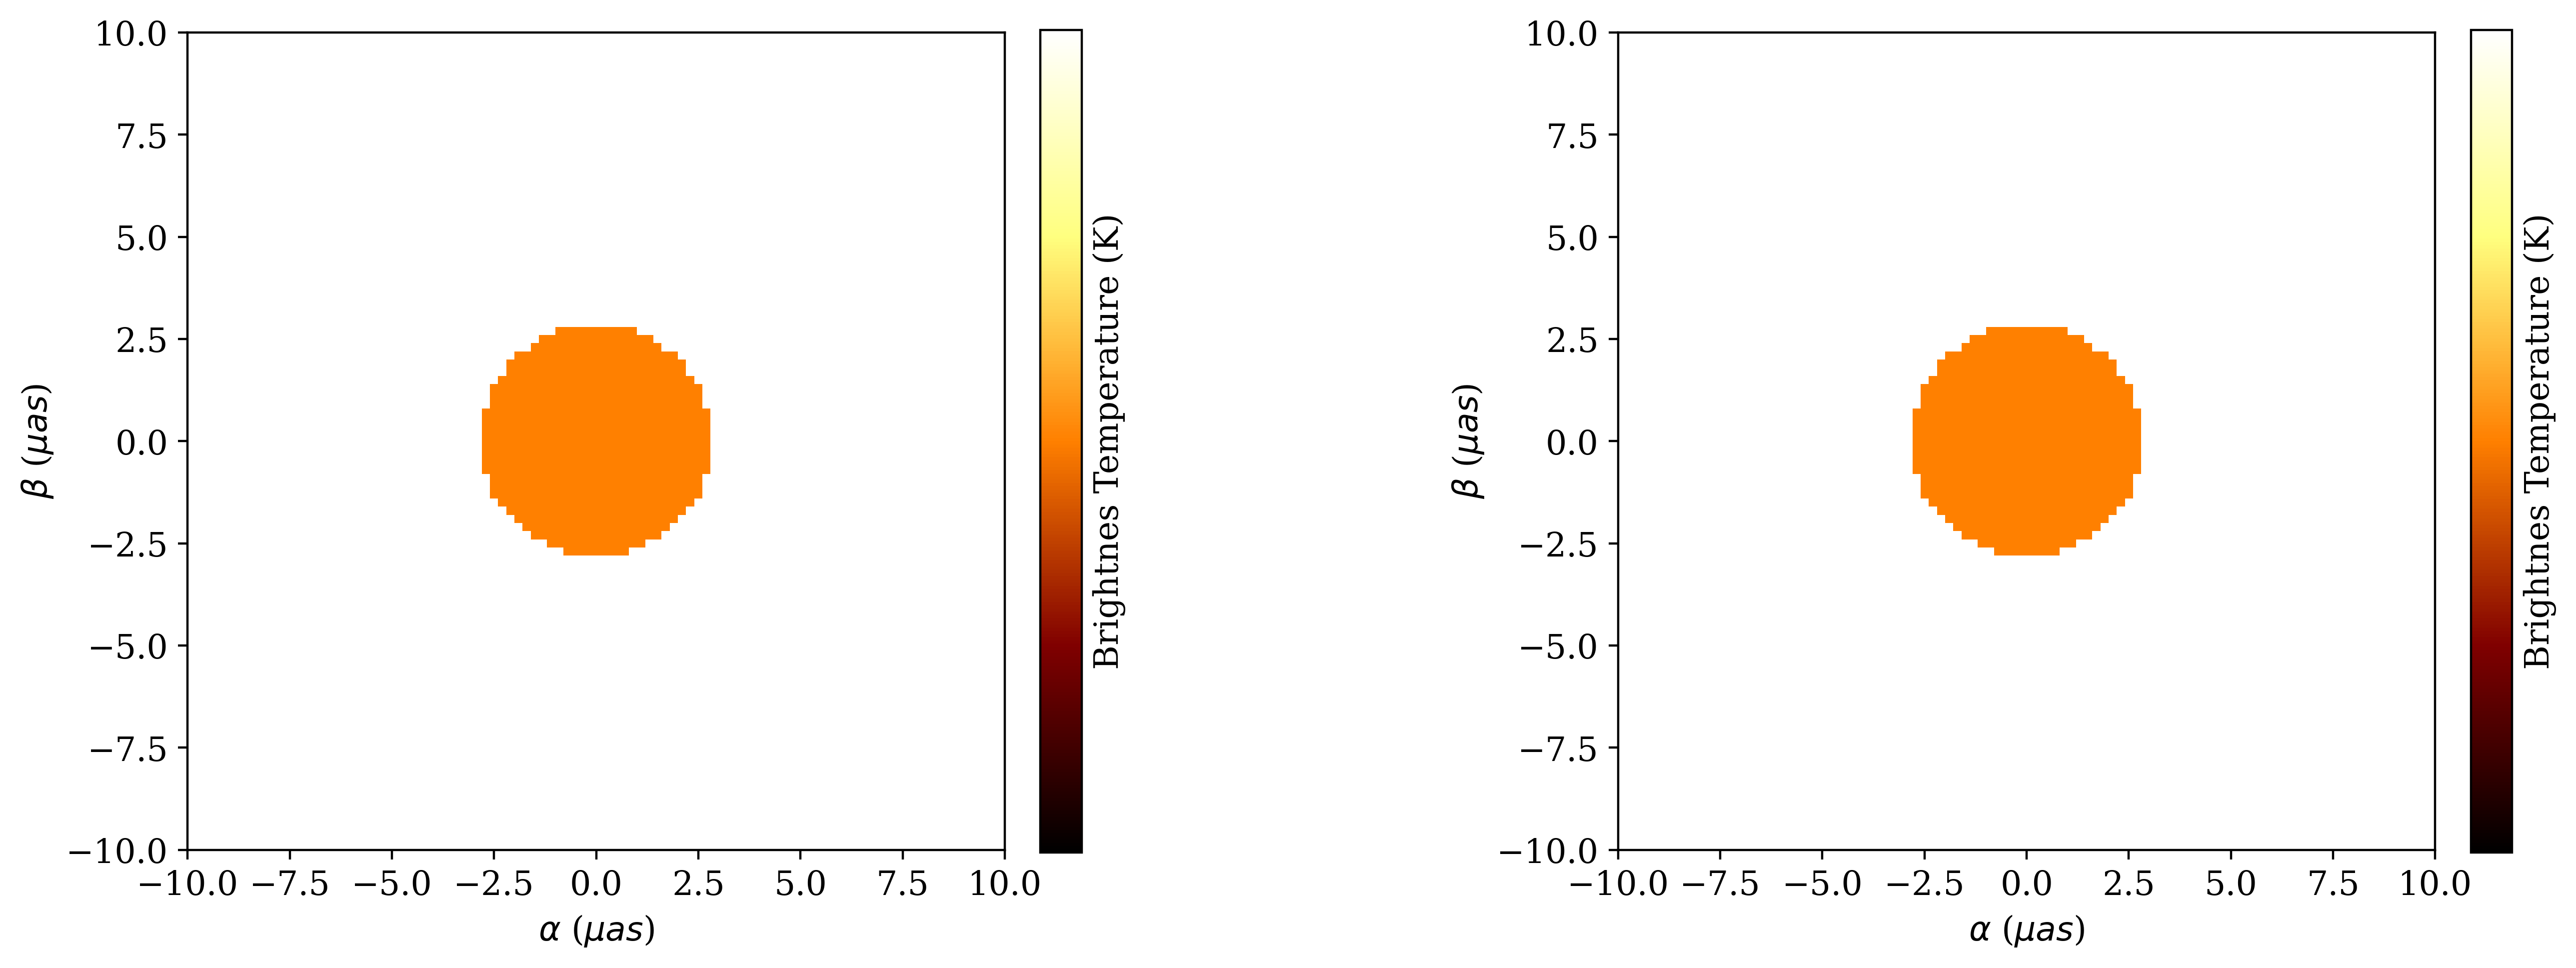

In [7]:
# one_M = ilp.rg_func(brightparams[1] * u.g).to(u.m)
# M2rads = np.arctan(one_M.value / dBH)
# M2uas = np.arctan(one_M.value / dBH)/muas_to_rad
# Mass distance units of 1 = .5842 uas
# Absorption
vmax0 = np.max(I0+I1+I2)*1.2
vmin = np.max(I0+I1+I2)*.5
fig, (ax0, ax1) = plt.subplots(1,2,figsize=[15,7],dpi=400)
#im = ax.imshow(I0+I1+I2,vmax=np.max(I0+I1+I2)*1.2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])
#im = ax.imshow(I0+I1+I2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],norm=matplotlib.colors.PowerNorm(.7,vmax=vmax))

im0 = ax0.imshow(I0+I1+I2,vmax=vmax0, origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])

# 
ax0.set_xlim(-10,10) # units of M
ax0.set_ylim(-10,10) 
    
    
ax0.set_xlabel(r"$\alpha$"+" "+r"($\mu as$)")
ax0.set_ylabel(r"$\beta$"+" "+r"($\mu as$)")

vmax1 = Absorbtion_Image.max()*1.2
# im1 = ax1.imshow(I1_Absorb + I2_Absorb + Absorbtion_Image,vmax=vmax0, origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])
im1 = ax1.imshow(Absorbtion_Image,vmax=vmax1, origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])

# 
ax1.set_xlim(-10,10) # units of M
ax1.set_ylim(-10,10) 
    
    
ax1.set_xlabel(r"$\alpha$"+" "+r"($\mu as$)")
ax1.set_ylabel(r"$\beta$"+" "+r"($\mu as$)")



colorbar0=fig.colorbar(im0, fraction=0.046, pad=0.04, format='%.1e', ticks=[
    vmax0*.8,
    vmax0*.6,
    vmax0*.4,
    vmax0*.2,
    vmax0*.05
    ],
    label="Brightnes Temperature (K)",
    ax=ax0
    )

colorbar1=fig.colorbar(im1, fraction=0.046, pad=0.04, format='%.1e', ticks=[
    vmax1*.8,
    vmax1*.6,
    vmax1*.4,
    vmax1*.2,
    vmax1*.05
    ],
    label="Brightnes Temperature (K)",
    ax=ax1
    )
plt.subplots_adjust(wspace=.6)
size = 100
'''Radii Calc'''
radius, theta = tls.radii_of_theta(I0,size)
# theta = np.arange(2*np.pi + 1, step=(2*np.pi + 1) / 100)
radius1, theta1 = tls.radii_of_theta(I1,size)
radius2, theta2 = tls.radii_of_theta(I2,size)

alpha =  radius * np.cos(theta)
beta =  radius * np.sin(theta)
alpha1 =  radius1 * np.cos(theta)
beta1 =  radius1 * np.sin(theta)
alpha2 =  radius2 * np.cos(theta)
beta2 =  radius2 * np.sin(theta)

# ax0.plot(alpha, beta, 'b')
# ax0.plot(alpha1, beta1, 'or')
# plt.plot(alphas_inner, betas_inner, '--c')
# plt.plot(alphas_outer, betas_outer, '--m')

# theta = np.arange(2*np.pi + 1, step=(2*np.pi + 1)/100)
# radii = np.array(tls.radii_of_theta(I0,100)) /100
# beta =  radii * np.sin(theta)
# alpha =  radii * np.cos(theta)
# plt.plot(alpha, beta, 'r')



# plt.savefig(
#     path_sub + 'images/low_rez/Dual_BHImage_a_{}|i_{}|nu_{}|mass_{}|scaleh_{}|thetab_{}|beta_{}|rie_{}|rb_{}|nth0_{}|te0_{}|pdens_{}|ptemp_{}|nscale_{}|emkey_{}|bkey_{}|nkey_{}|tnkey_{}|bnkey_{}.png'.format(
#     spin_case,
#     i_case,
#     "{:.1e}".format(brightparams["nu0"]),
#     "{:.1e}".format(brightparams["mass"]), 
#     float(brightparams["scale_height"]),
#     "{:.3f}".format(brightparams["theta_b"]), 
#     "{:.2f}".format(float(brightparams["beta"])),
#     "{:.1f}".format(float(brightparams["r_ie"])), 
#     "{:.1f}".format(float(brightparams["rb_0"])),
#     "{:.1e}".format(brightparams["n_th0"]),
#     "{:.1e}".format(brightparams["t_e0"]),
#     float(brightparams["p_dens"]),
#     float(brightparams["p_temp"]),
#     "{:.1f}".format(brightparams["nscale"]),
#     funckeys["emodelkey"],
#     funckeys["bkey"],
#     funckeys["nnoisykey"],
#     funckeys["tnoisykey"],
#     funckeys["bnoisykey"]
#     ), bbox_inches='tight'
# )
plt.show()

In [106]:
ring_radii_n0_array = np.zeros(10) 
test = np.ones(10)
ring_radii_n0_array = np.vstack((ring_radii_n0_array, test))
print(ring_radii_n0_array.shape)

(2, 10)


In [97]:
test1 = np.matrix(np.arange(3)).T
test2 = np.matrix(np.ones(3))
print(test1 @ test2)

[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]]


In [75]:
test = np.ndarray([3,1])
print(np.matrix(test).ravel().shape)
print(np.ravel(np.matrix(test).ravel()).shape)
print(theta.flatten().shape)

(1, 3)
(3,)
(1, 100)


'Radii Calc'

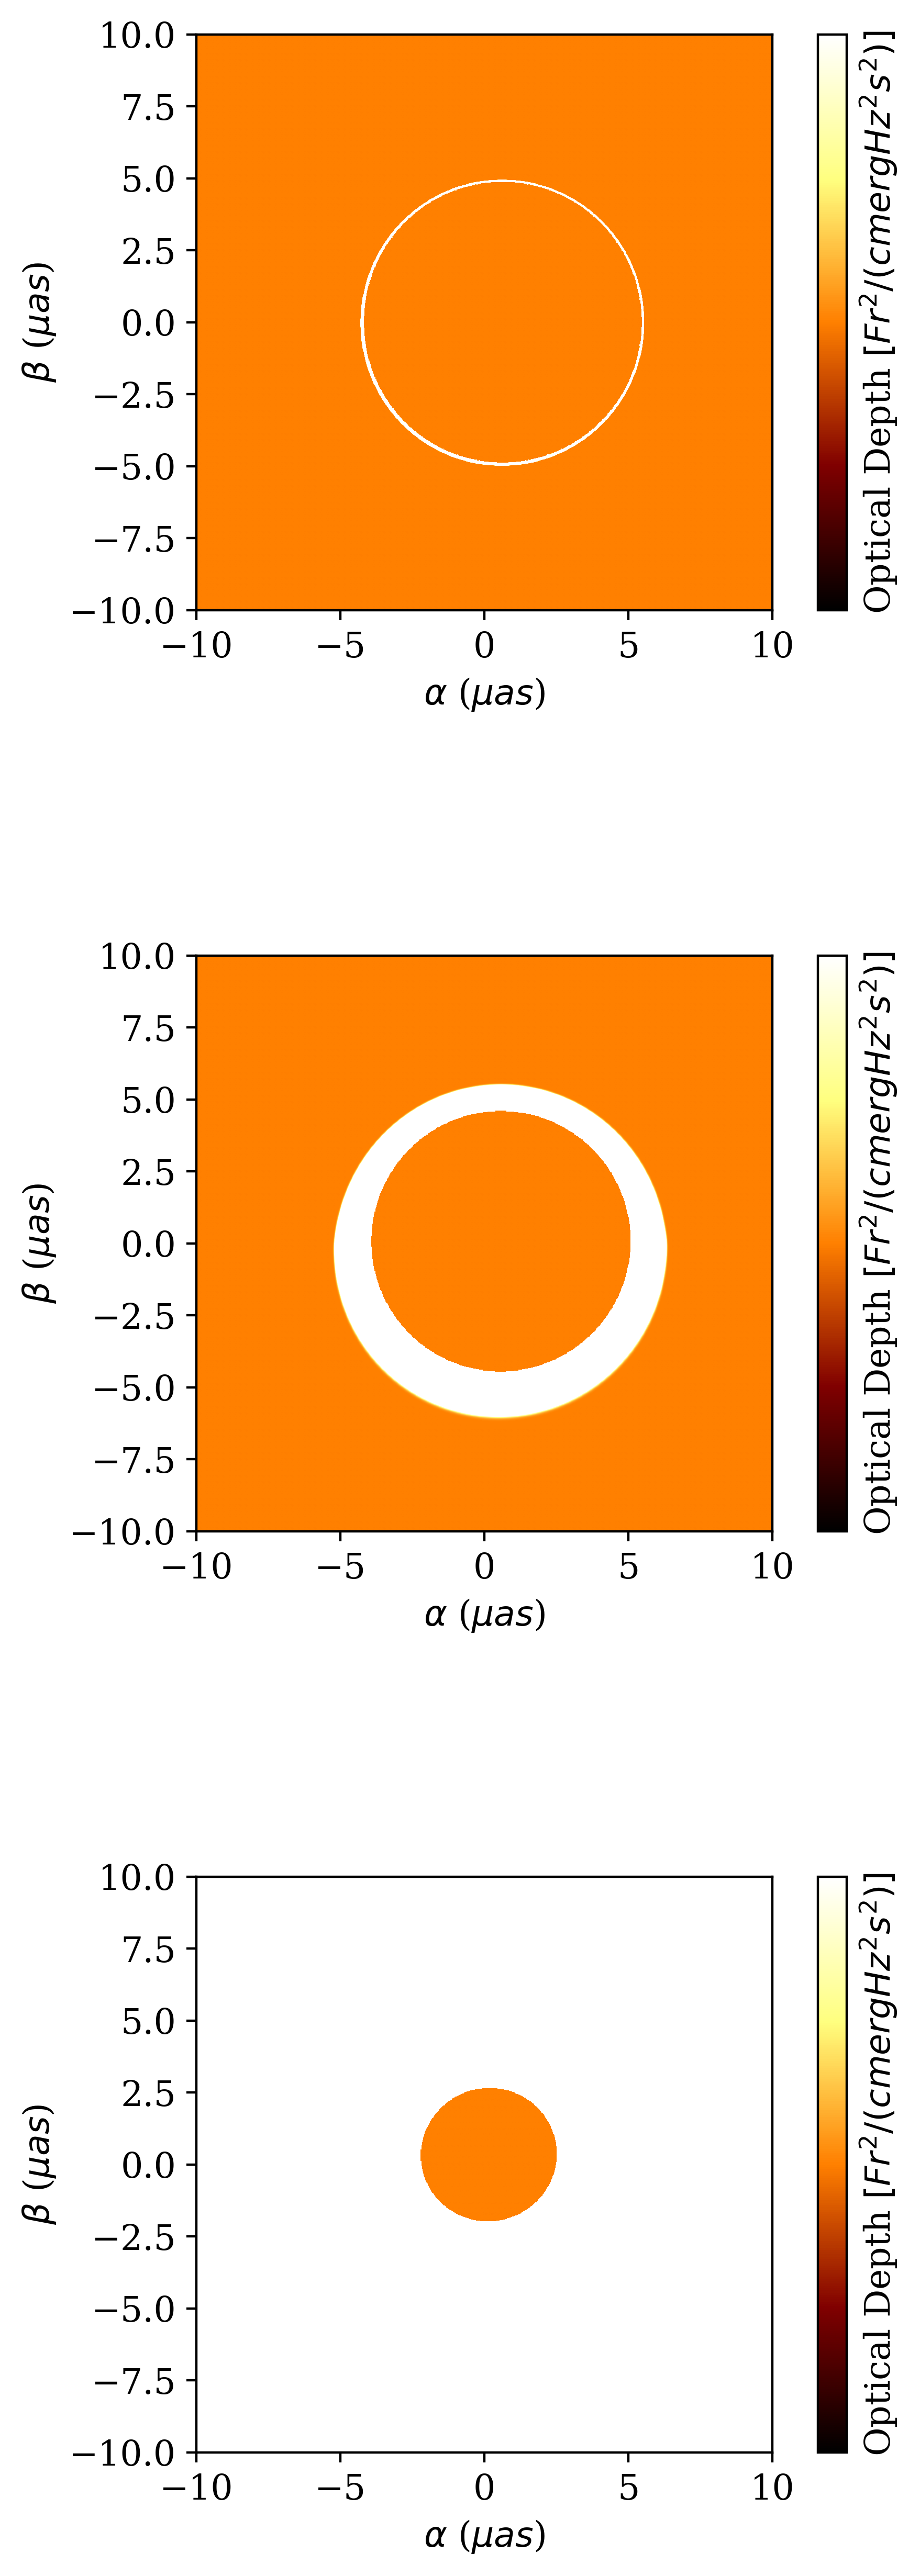

In [142]:

# one_M = ilp.rg_func(brightparams[1] * u.g).to(u.m)
# M2rads = np.arctan(one_M.value / dBH)
# M2uas = np.arctan(one_M.value / dBH)/muas_to_rad
# Mass distance units of 1 = .5842 uas
# Absorption

# vmin = np.max(I0+I1+I2)*.5
fig, (ax0, ax1, ax2) = plt.subplots(3,1,figsize=[7,15],dpi=400)
#im = ax.imshow(I0+I1+I2,vmax=np.max(I0+I1+I2)*1.2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])
#im = ax.imshow(I0+I1+I2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],norm=matplotlib.colors.PowerNorm(.7,vmax=vmax))
vmax2 = np.max(tau2)*1.2
im0 = ax0.imshow(tau2,vmax=vmax2, origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])

# 
ax0.set_xlim(-10,10) # units of M
ax0.set_ylim(-10,10) 
    
    
ax0.set_xlabel(r"$\alpha$"+" "+r"($\mu as$)")
ax0.set_ylabel(r"$\beta$"+" "+r"($\mu as$)")
#---------------------------------------------------------------------------------------------
vmax1 = tau1.max()*1.2
im1 = ax1.imshow(tau1,vmax=vmax1, origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])

# 
ax1.set_xlim(-10,10) # units of M
ax1.set_ylim(-10,10) 
    
    
ax1.set_xlabel(r"$\alpha$"+" "+r"($\mu as$)")
ax1.set_ylabel(r"$\beta$"+" "+r"($\mu as$)")
#---------------------------------------------------------------------------------------------
vmax0 = tau0.max()*1.2
im2 = ax2.imshow(tau0,vmax=vmax0, origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])

# 
ax2.set_xlim(-10,10) # units of M
ax2.set_ylim(-10,10) 
    
    
ax2.set_xlabel(r"$\alpha$"+" "+r"($\mu as$)")
ax2.set_ylabel(r"$\beta$"+" "+r"($\mu as$)")




colorbar0=fig.colorbar(im0, fraction=0.046, pad=0.04, format='%.1e', ticks=[
    vmax2*.8,
    vmax2*.6,
    vmax2*.4,
    vmax2*.2,
    vmax2*.05
    ],
    label= R"Optical Depth $[Fr^2 / (cm erg Hz^2 s^2)]$",
    ax=ax0
    )

colorbar1=fig.colorbar(im1, fraction=0.046, pad=0.04, format='%.1e', ticks=[
    vmax1*.8,
    vmax1*.6,
    vmax1*.4,
    vmax1*.2,
    vmax1*.05
    ],
    label=R"Optical Depth $[Fr^2 / (cm erg Hz^2 s^2)]$",
    ax=ax1
    )
colorbar2=fig.colorbar(im2, fraction=0.046, pad=0.04, format='%.1e', ticks=[
    vmax0*.8,
    vmax0*.6,
    vmax0*.4,
    vmax0*.2,
    vmax0*.05
    ],
    label=R"Optical Depth $[Fr^2 / (cm erg Hz^2 s^2)]$",
    ax=ax2
    )
plt.subplots_adjust(hspace=.6)

'''Radii Calc'''
# radius = tls.radii_of_theta(I0,100)
# theta = np.arange(2*np.pi + 1, step=(2*np.pi + 1) / 100)
# radius1 = tls.radii_of_theta(I1,100)
# radius2 = tls.radii_of_theta(I2,100)

# alpha =  radius * np.cos(theta)
# beta =  radius * np.sin(theta)
# alpha1 =  radius1 * np.cos(theta)
# beta1 =  radius1 * np.sin(theta)
# alpha2 =  radius2 * np.cos(theta)
# beta2 =  radius2 * np.sin(theta)

# plt.plot(alpha, beta, 'b')
# plt.plot(alpha2, beta2, 'r')
# plt.plot(alphas_inner, betas_inner, '--c')
# plt.plot(alphas_outer, betas_outer, '--m')

# theta = np.arange(2*np.pi + 1, step=(2*np.pi + 1)/100)
# radii = np.array(tls.radii_of_theta(I0,100)) /100
# beta =  radii * np.sin(theta)
# alpha =  radii * np.cos(theta)
# plt.plot(alpha, beta, 'r')
# plt.savefig(
#     path_sub + 'images/low_rez/Tau_Timeline_BHImage_a_{}|i_{}|nu_{}|mass_{}|scaleh_{}|thetab_{}|beta_{}|rie_{}|rb_{}|nth0_{}|te0_{}|pdens_{}|ptemp_{}|nscale_{}|emkey_{}|bkey_{}|nkey_{}|tnkey_{}|bnkey_{}.png'.format(
#     spin_case,
#     i_case,
#     "{:.1e}".format(brightparams["nu0"]),
#     "{:.1e}".format(brightparams["mass"]), 
#     float(brightparams["scale_height"]),
#     "{:.3f}".format(brightparams["theta_b"]), 
#     "{:.2f}".format(float(brightparams["beta"])),
#     "{:.1f}".format(float(brightparams["r_ie"])), 
#     "{:.1f}".format(float(brightparams["rb_0"])),
#     "{:.1e}".format(brightparams["n_th0"]),
#     "{:.1e}".format(brightparams["t_e0"]),
#     float(brightparams["p_dens"]),
#     float(brightparams["p_temp"]),
#     "{:.1f}".format(brightparams["nscale"]),
#     funckeys["emodelkey"],
#     funckeys["bkey"],
#     funckeys["nnoisykey"],
#     funckeys["tnoisykey"],
#     funckeys["bnoisykey"]
#     ), bbox_inches='tight'
# )
# plt.show()


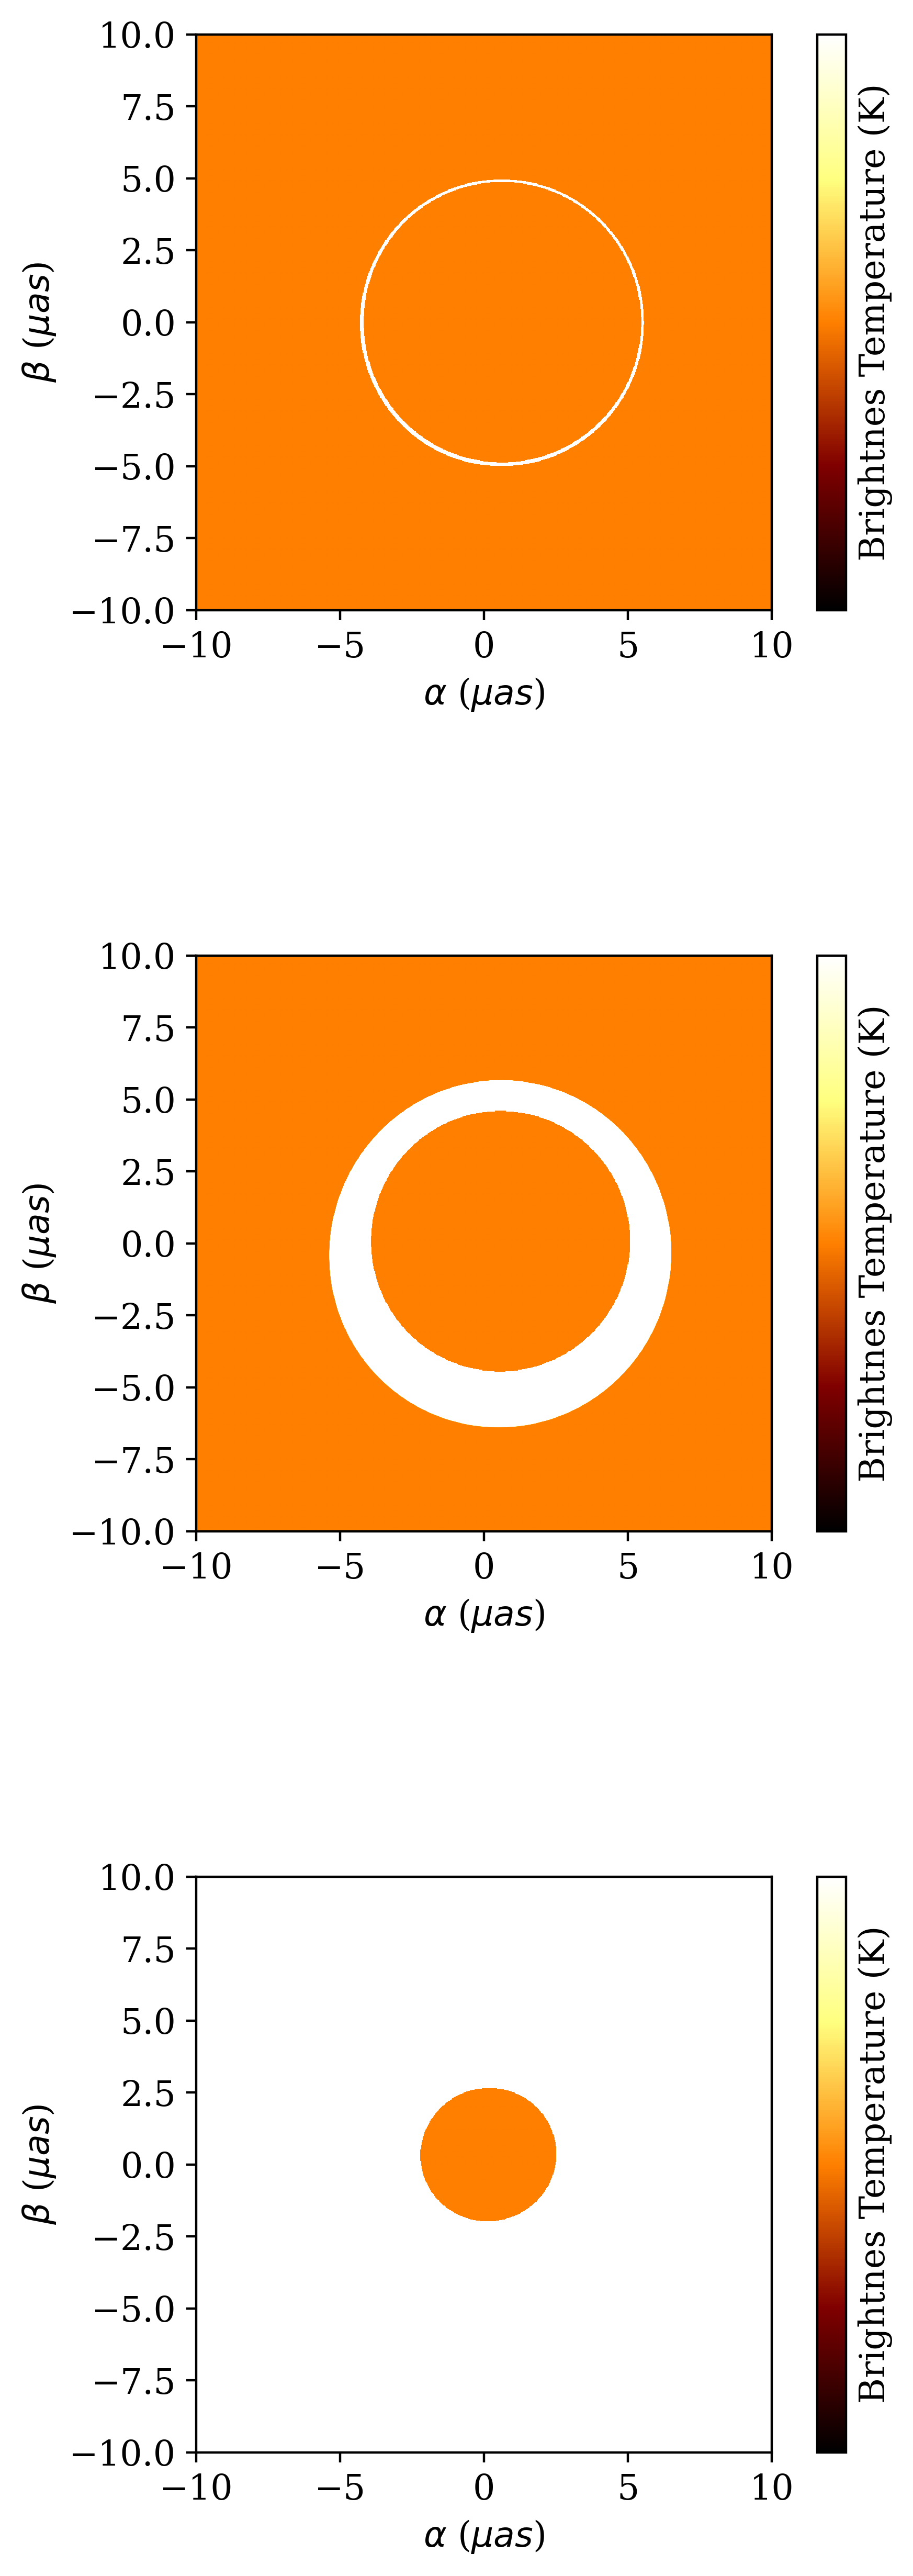

In [143]:
# one_M = ilp.rg_func(brightparams[1] * u.g).to(u.m)
# M2rads = np.arctan(one_M.value / dBH)
# M2uas = np.arctan(one_M.value / dBH)/muas_to_rad
# Mass distance units of 1 = .5842 uas
# Absorption

# vmin = np.max(I0+I1+I2)*.5
fig, (ax0, ax1, ax2) = plt.subplots(3,1,figsize=[7,15],dpi=400)
#im = ax.imshow(I0+I1+I2,vmax=np.max(I0+I1+I2)*1.2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])
#im = ax.imshow(I0+I1+I2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],norm=matplotlib.colors.PowerNorm(.7,vmax=vmax))
vmax2 = np.max(I2_Absorb)*1.2
im0 = ax0.imshow(I2_Absorb,vmax=vmax2, origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])

# 
ax0.set_xlim(-10,10) # units of M
ax0.set_ylim(-10,10) 
    
    
ax0.set_xlabel(r"$\alpha$"+" "+r"($\mu as$)")
ax0.set_ylabel(r"$\beta$"+" "+r"($\mu as$)")
#---------------------------------------------------------------------------------------------
vmax1 = I1_Absorb.max()*1.2
im1 = ax1.imshow(I1_Absorb,vmax=vmax1, origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])

# 
ax1.set_xlim(-10,10) # units of M
ax1.set_ylim(-10,10) 
    
    
ax1.set_xlabel(r"$\alpha$"+" "+r"($\mu as$)")
ax1.set_ylabel(r"$\beta$"+" "+r"($\mu as$)")
#---------------------------------------------------------------------------------------------
vmax0 = Absorbtion_Image.max()*1.2
im2 = ax2.imshow(Absorbtion_Image,vmax=vmax0, origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])

# 
ax2.set_xlim(-10,10) # units of M
ax2.set_ylim(-10,10) 
    
    
ax2.set_xlabel(r"$\alpha$"+" "+r"($\mu as$)")
ax2.set_ylabel(r"$\beta$"+" "+r"($\mu as$)")




colorbar0=fig.colorbar(im0, fraction=0.046, pad=0.04, format='%.1e', ticks=[
    vmax2*.8,
    vmax2*.6,
    vmax2*.4,
    vmax2*.2,
    vmax2*.05
    ],
    label="Brightnes Temperature (K)",
    ax=ax0
    )

colorbar1=fig.colorbar(im1, fraction=0.046, pad=0.04, format='%.1e', ticks=[
    vmax1*.8,
    vmax1*.6,
    vmax1*.4,
    vmax1*.2,
    vmax1*.05
    ],
    label="Brightnes Temperature (K)",
    ax=ax1
    )
colorbar2=fig.colorbar(im2, fraction=0.046, pad=0.04, format='%.1e', ticks=[
    vmax0*.8,
    vmax0*.6,
    vmax0*.4,
    vmax0*.2,
    vmax0*.05
    ],
    label="Brightnes Temperature (K)",
    ax=ax2
    )
plt.subplots_adjust(hspace=.6)

'''Radii Calc'''
# radius = tls.radii_of_theta(I0,100)
# theta = np.arange(2*np.pi + 1, step=(2*np.pi + 1) / 100)
# radius1 = tls.radii_of_theta(I1,100)
# radius2 = tls.radii_of_theta(I2,100)

# alpha =  radius * np.cos(theta)
# beta =  radius * np.sin(theta)
# alpha1 =  radius1 * np.cos(theta)
# beta1 =  radius1 * np.sin(theta)
# alpha2 =  radius2 * np.cos(theta)
# beta2 =  radius2 * np.sin(theta)

# plt.plot(alpha, beta, 'b')
# plt.plot(alpha2, beta2, 'r')
# plt.plot(alphas_inner, betas_inner, '--c')
# plt.plot(alphas_outer, betas_outer, '--m')

# theta = np.arange(2*np.pi + 1, step=(2*np.pi + 1)/100)
# radii = np.array(tls.radii_of_theta(I0,100)) /100
# beta =  radii * np.sin(theta)
# alpha =  radii * np.cos(theta)
# plt.plot(alpha, beta, 'r')
# plt.savefig(
#     # 'absorption/Absorb_Timeline_BHImage_a_{}|i_{}|nu_{}|mass_{}|scaleh_{}|thetab_{}|beta_{}|rie_{}|rb_{}|nth0_{}|te0_{}|pdens_{}|ptemp_{}|nscale_{}|abkey_{}|emkey_{}|bkey_{}|nkey_{}|tnkey_{}|bnkey_{}.png'.format(
#     path_sub + 'images/low_rez/Absorb_Timeline_BHImage_a_{}|i_{}|nu_{}|mass_{}|scaleh_{}|thetab_{}|beta_{}|rie_{}|rb_{}|nth0_{}|te0_{}|pdens_{}|ptemp_{}|nscale_{}|emkey_{}|bkey_{}|nkey_{}|tnkey_{}|bnkey_{}.png'.format(
#     spin_case,
#     i_case,
#     "{:.1e}".format(brightparams["nu0"]),
#     "{:.1e}".format(brightparams["mass"]), 
#     float(brightparams["scale_height"]),
#     "{:.3f}".format(brightparams["theta_b"]), 
#     "{:.2f}".format(float(brightparams["beta"])),
#     "{:.1f}".format(float(brightparams["r_ie"])), 
#     "{:.1f}".format(float(brightparams["rb_0"])),
#     "{:.1e}".format(brightparams["n_th0"]),
#     "{:.1e}".format(brightparams["t_e0"]),
#     float(brightparams["p_dens"]),
#     float(brightparams["p_temp"]),
#     "{:.1f}".format(brightparams["nscale"]),
#     funckeys["emodelkey"],
#     funckeys["bkey"],
#     funckeys["nnoisykey"],
#     funckeys["tnoisykey"],
#     funckeys["bnoisykey"]
#     ), bbox_inches='tight'
# )
plt.show()


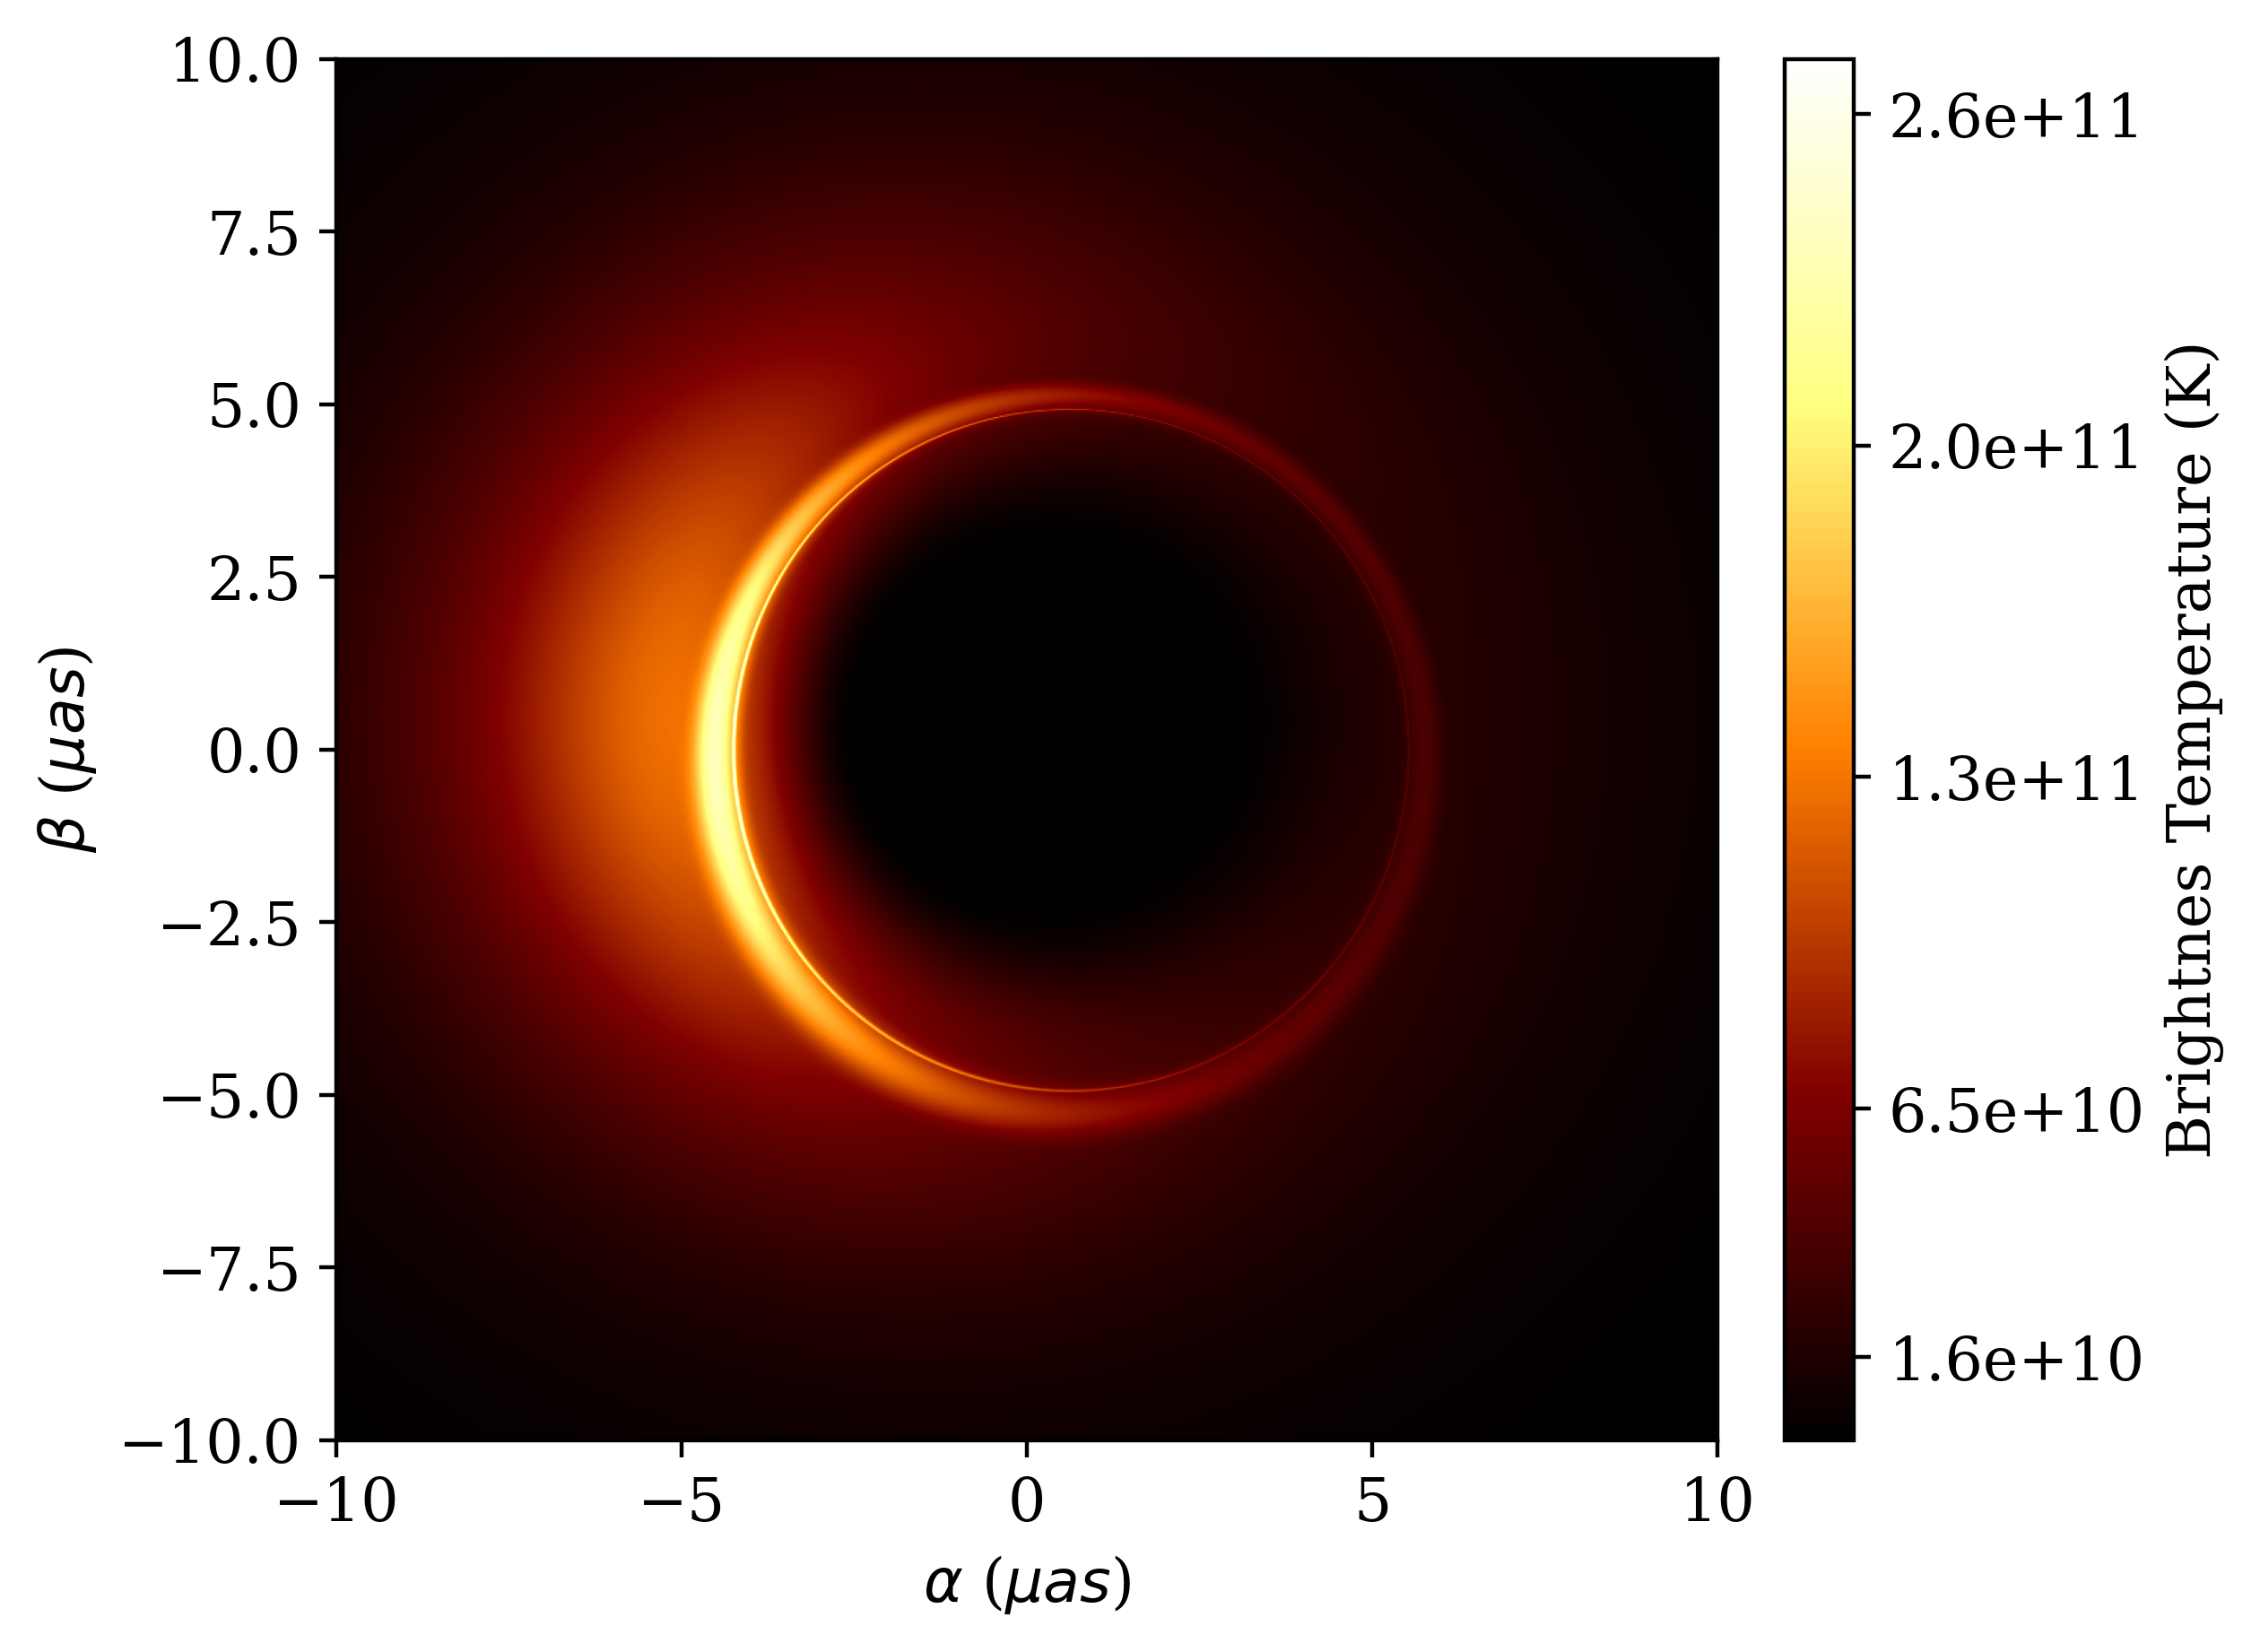

In [85]:
# one_M = ilp.rg_func(brightparams[1] * u.g).to(u.m)
# M2rads = np.arctan(one_M.value / dBH)
# M2uas = np.arctan(one_M.value / dBH)/muas_to_rad
# Mass distance units of 1 = .5842 uas
# Absorption
vmax = np.max(I0+I1+I2)*1.2
vmin = np.max(I0+I1+I2)*.5
fig, ax = plt.subplots(figsize=[6,5],dpi=400)
#im = ax.imshow(I0+I1+I2,vmax=np.max(I0+I1+I2)*1.2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])
#im = ax.imshow(I0+I1+I2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],norm=matplotlib.colors.PowerNorm(.7,vmax=vmax))

im = ax.imshow(I0+I1+I2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])

# 
ax.set_xlim(-10,10) # units of M
ax.set_ylim(-10,10) 
    
    
ax.set_xlabel(r"$\alpha$"+" "+r"($\mu as$)")
ax.set_ylabel(r"$\beta$"+" "+r"($\mu as$)")

# ax.set_xticks([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10], labels=[
#     str('{:.3}'.format(-10 * M2uas)),
#     str('{:.3}'.format(-7.5 * M2uas)),
#     str('{:.3}'.format(-5 * M2uas)),
#     str('{:.3}'.format(-2.5 * M2uas)),
#     str('{:.3}'.format(0 * M2uas)),
#     str('{:.3}'.format(2.5 * M2uas)),
#     str('{:.3}'.format(5 * M2uas)), 
#     str('{:.3}'.format(7.5 * M2uas)), 
#     str('{:.3}'.format(10 * M2uas))
#     ])

# ax.set_yticks([-10, -7.5, -5, -2.5, 0, 2.5, 5, 7.5, 10], labels=[
#     str('{:.3}'.format(-10 * M2uas)),
#     str('{:.3}'.format(-7.5 * M2uas)),
#     str('{:.3}'.format(-5 * M2uas)),
#     str('{:.3}'.format(-2.5 * M2uas)),
#     str('{:.3}'.format(0 * M2uas)),
#     str('{:.3}'.format(2.5 * M2uas)),
#     str('{:.3}'.format(5 * M2uas)), 
#     str('{:.3}'.format(7.5 * M2uas)), 
#     str('{:.3}'.format(10 * M2uas))
#     ])



colorbar=plt.colorbar(im, fraction=0.046, pad=0.04, format='%.1e', ticks=[
    vmax*.8,
    vmax*.6,
    vmax*.4,
    vmax*.2,
    vmax*.05
    ],
    label="Brightnes Temperature (K)"
    )

'''Radii Calc'''
# radius = tls.radii_of_theta(I0,100)
# theta = np.arange(2*np.pi + 1, step=(2*np.pi + 1) / 100)
# radius1 = tls.radii_of_theta(I1,100)
# radius2 = tls.radii_of_theta(I2,100)

# alpha =  radius * np.cos(theta)
# beta =  radius * np.sin(theta)
# alpha1 =  radius1 * np.cos(theta)
# beta1 =  radius1 * np.sin(theta)
# alpha2 =  radius2 * np.cos(theta)
# beta2 =  radius2 * np.sin(theta)

# plt.plot(alpha, beta, 'b')
# plt.plot(alpha2, beta2, 'r')
# plt.plot(alphas_inner, betas_inner, '--c')
# plt.plot(alphas_outer, betas_outer, '--m')

# theta = np.arange(2*np.pi + 1, step=(2*np.pi + 1)/100)
# radii = np.array(tls.radii_of_theta(I0,100)) /100
# beta =  radii * np.sin(theta)
# alpha =  radii * np.cos(theta)
# plt.plot(alpha, beta, 'r')



plt.savefig(
    'absorption/BHImage_a_{}|i_{}|nu_{}|mass_{}|scaleh_{}|thetab_{}|beta_{}|rie_{}|rb_{}|nth0_{}|te0_{}|pdens_{}|ptemp_{}|nscale_{}|emkey_{}|bkey_{}|nkey_{}|tnkey_{}|bnkey_{}.png'.format(
    spin_case,
    i_case,
    "{:.1e}".format(brightparams["nu0"]),
    "{:.1e}".format(brightparams["mass"]), 
    float(brightparams["scale_height"]),
    "{:.3f}".format(brightparams["theta_b"]), 
    "{:.2f}".format(float(brightparams["beta"])),
    "{:.1f}".format(float(brightparams["r_ie"])), 
    "{:.1f}".format(float(brightparams["rb_0"])),
    "{:.1e}".format(brightparams["n_th0"]),
    "{:.1e}".format(brightparams["t_e0"]),
    float(brightparams["p_dens"]),
    float(brightparams["p_temp"]),
    "{:.1f}".format(brightparams["nscale"]),
    funckeys["emodelkey"],
    funckeys["bkey"],
    funckeys["nnoisykey"],
    funckeys["tnoisykey"],
    funckeys["bnoisykey"]
    ), bbox_inches='tight'
)
plt.show()

In [ ]:
testa = \pm\sqrt{eta}
testb = np.sqrt(eta+a**2*np.cos(thetao)**2-lamb**2/(np.tan(thetao)**2))

In [29]:
a

NameError: name 'a' is not defined

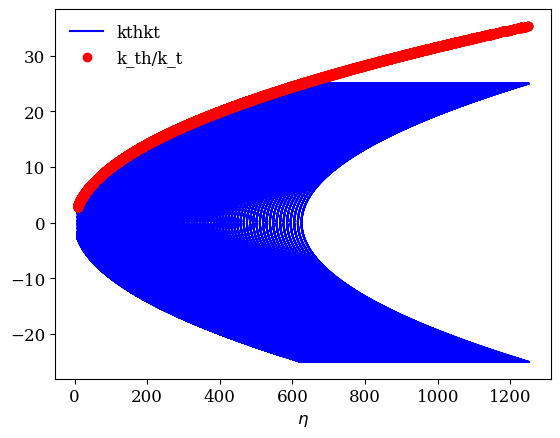

In [50]:

plt.plot(eta0,testb0,'b', label='kthkt')
plt.plot(eta0,-testb0,'b')
plt.plot(eta0,testa0, 'or', label="k_th/k_t"),
plt.legend(frameon=False)
plt.xlabel(R'$\eta$')
plt.savefig(image_path + "test_equal")

In [21]:
path_sub

'../aart_results/'

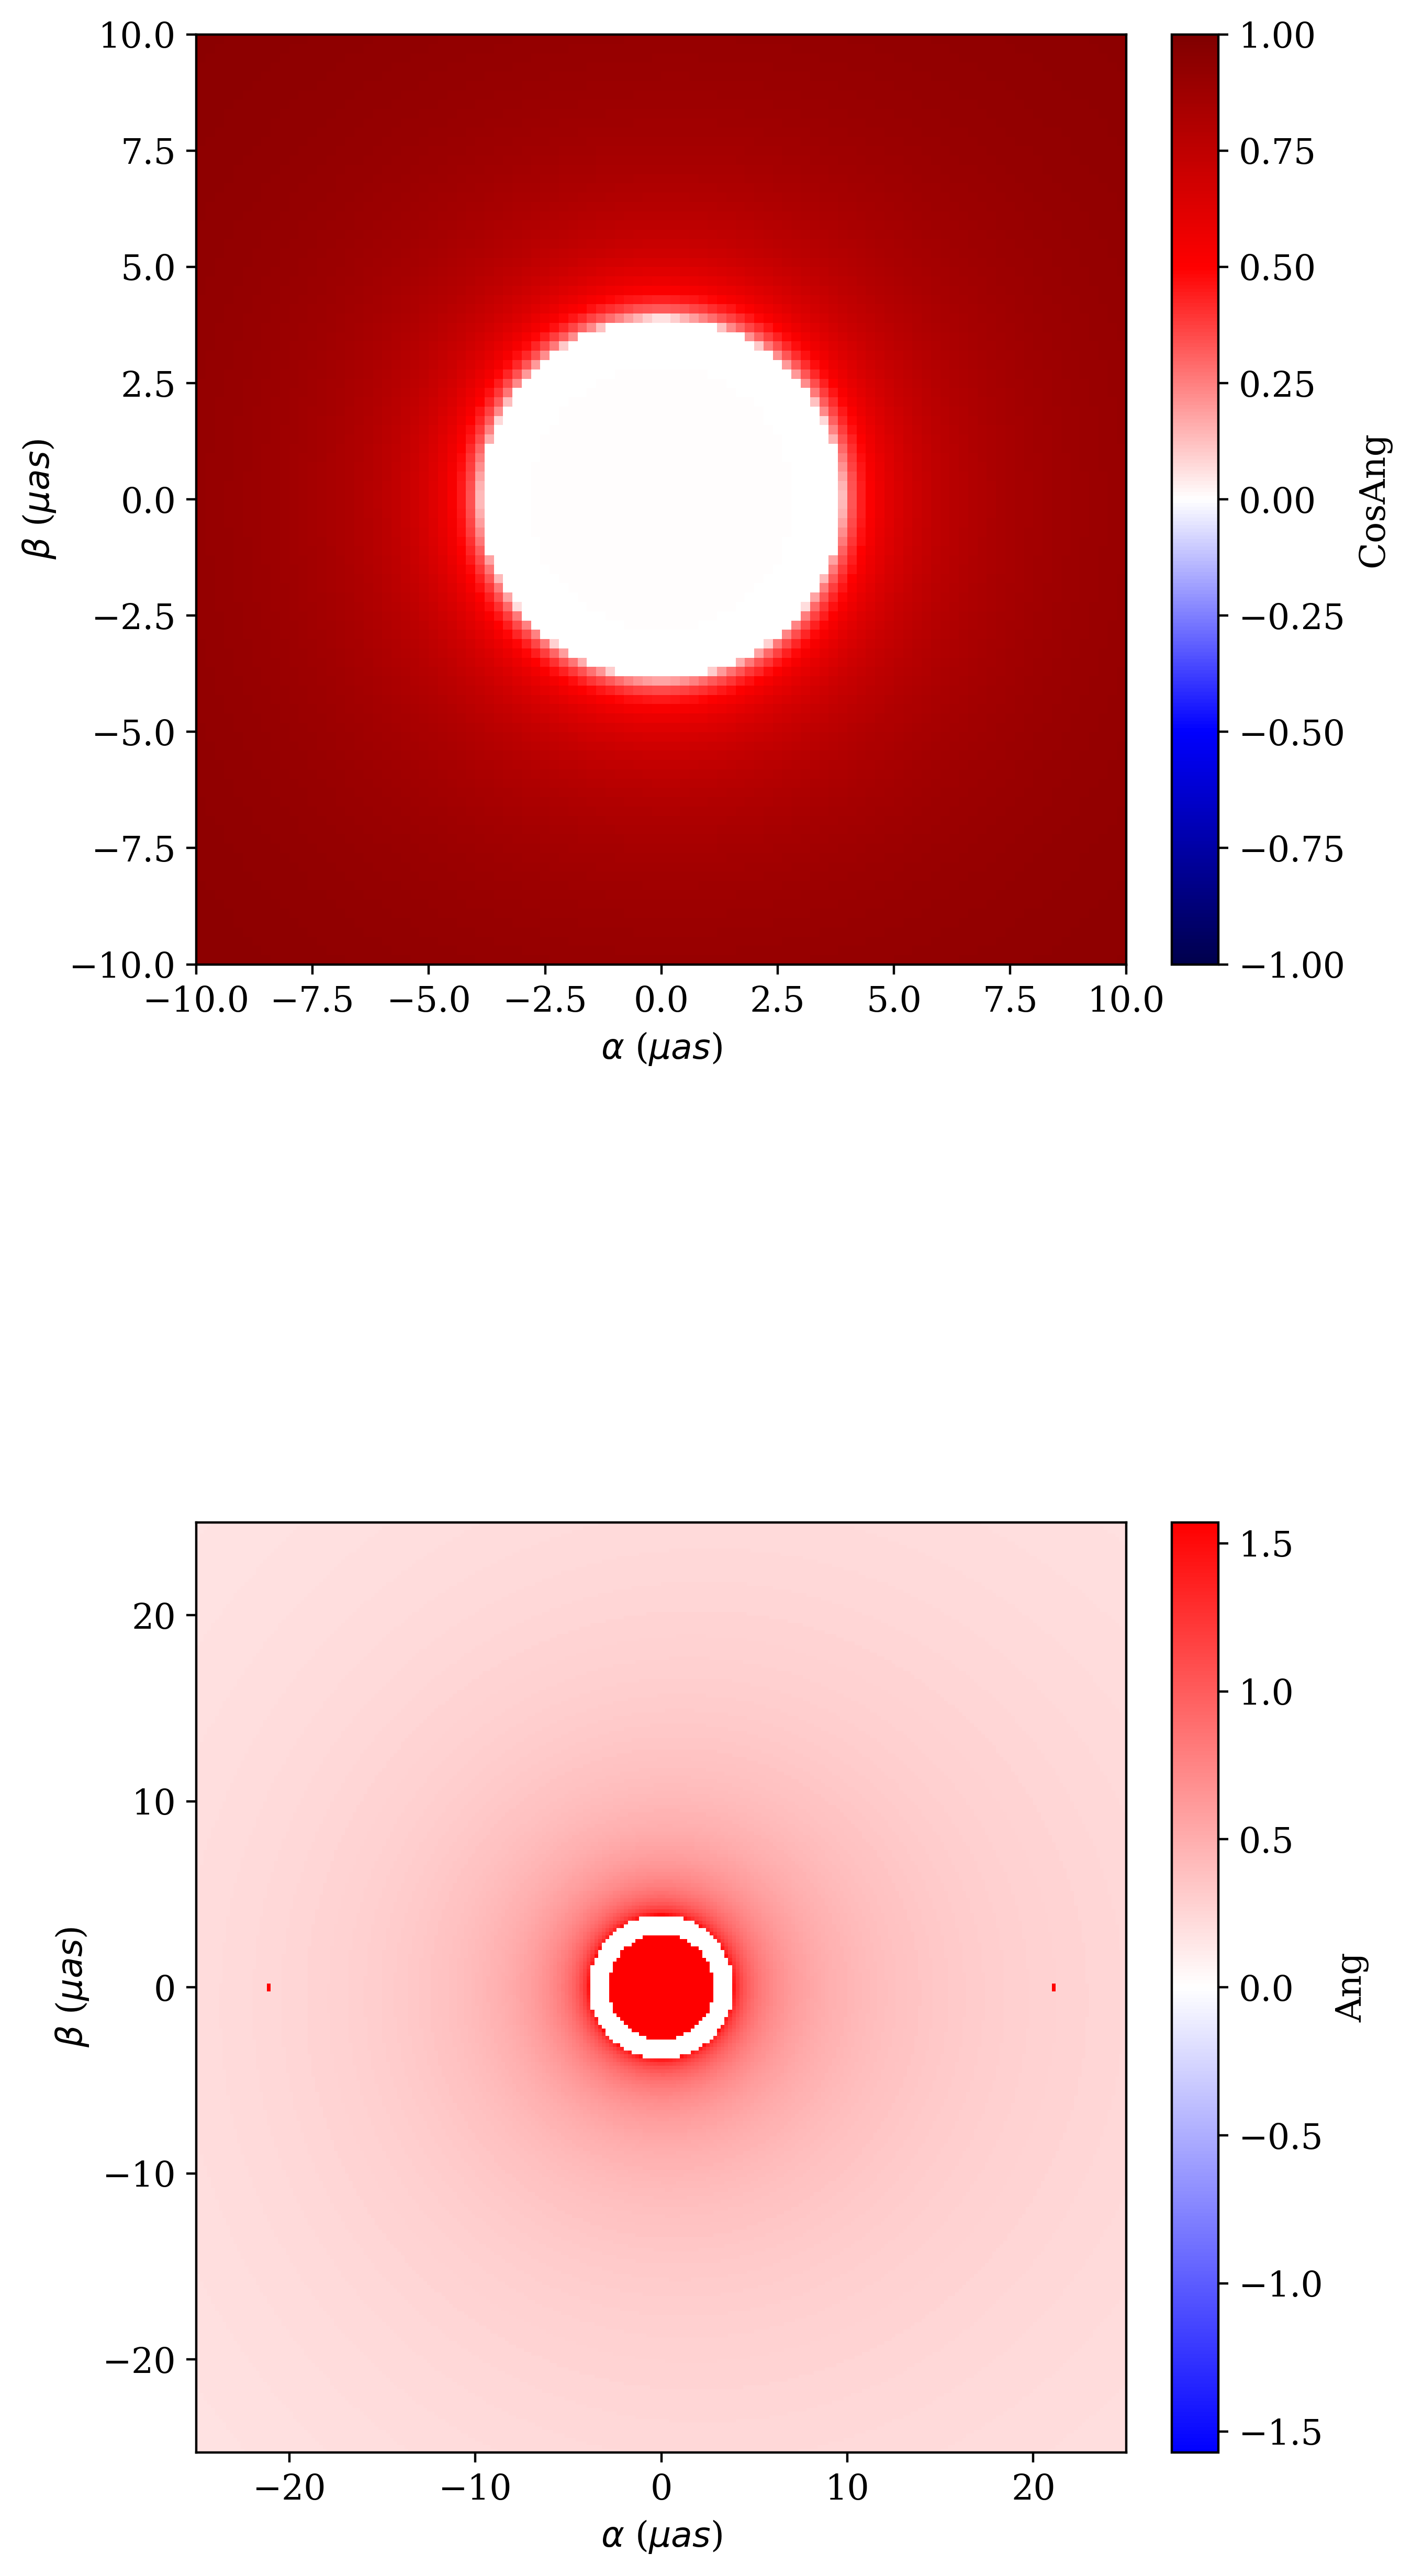

In [26]:

# one_M = ilp.rg_func(brightparams[1] * u.g).to(u.m)
# M2rads = np.arctan(one_M.value / dBH)
# M2uas = np.arctan(one_M.value / dBH)/muas_to_rad
# Mass distance units of 1 = .5842 uas
# Absorption
lim0=25
# vmin = np.max(I0+I1+I2)*.5
fig, (ax1, ax2) = plt.subplots(2,1,figsize=[7,15],dpi=400)
#im = ax.imshow(I0+I1+I2,vmax=np.max(I0+I1+I2)*1.2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])
#im = ax.imshow(I0+I1+I2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0],norm=matplotlib.colors.PowerNorm(.7,vmax=vmax))
vmin1 = -1
vmax1 = 1
im1 = ax1.imshow(cosAng0,vmax=vmax1, vmin=vmin1, origin="lower",cmap="seismic",extent=[-lim0,lim0,-lim0,lim0])

# 
ax1.set_xlim(-10,10) # units of M
ax1.set_ylim(-10,10) 


    
ax1.set_xlabel(r"$\alpha$"+" "+r"($\mu as$)")
ax1.set_ylabel(r"$\beta$"+" "+r"($\mu as$)")

colorbar1=fig.colorbar(im1, fraction=0.046, pad=0.04,
    label=R"CosAng",
    ax=ax1
    )
#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------

vmax2 = np.pi/2
vmin2= -np.pi/2
# im2 = ax2.imshow(cosAng0,vmax=vmax0, origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])
# im2 = ax2.imshow(cosAng0, origin="lower",cmap="bwr",extent=[-lim0,lim0,-lim0,lim0], vmax=vmax, vmin=vmin)
im2 = ax2.imshow(np.arccos(cosAng0), origin="lower",cmap="bwr",extent=[-25,25,-25,25], vmax=vmax2, vmin=vmin2)

# 
ax2.set_xlim(-25,25) # units of M
ax2.set_ylim(-25,25) 
    # Siesmic
    
ax2.set_xlabel(r"$\alpha$"+" "+r"($\mu as$)")
ax2.set_ylabel(r"$\beta$"+" "+r"($\mu as$)")



colorbar2=fig.colorbar(im2, fraction=0.046, pad=0.04,
    label=R"Ang",
    ax=ax2
    )
plt.subplots_adjust(hspace=.6)

plt.savefig(image_path + "cosAngMap", bbox_inches='tight')


# Profile Plots

In [25]:
test = np.array([1,1,1]) * ilp.specific_int_units
print(str(test.unit))

Fr2 Hz s / cm3


In [155]:
len(axs)

18

In [54]:
print(np.zeros(10))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [94]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import pyplot


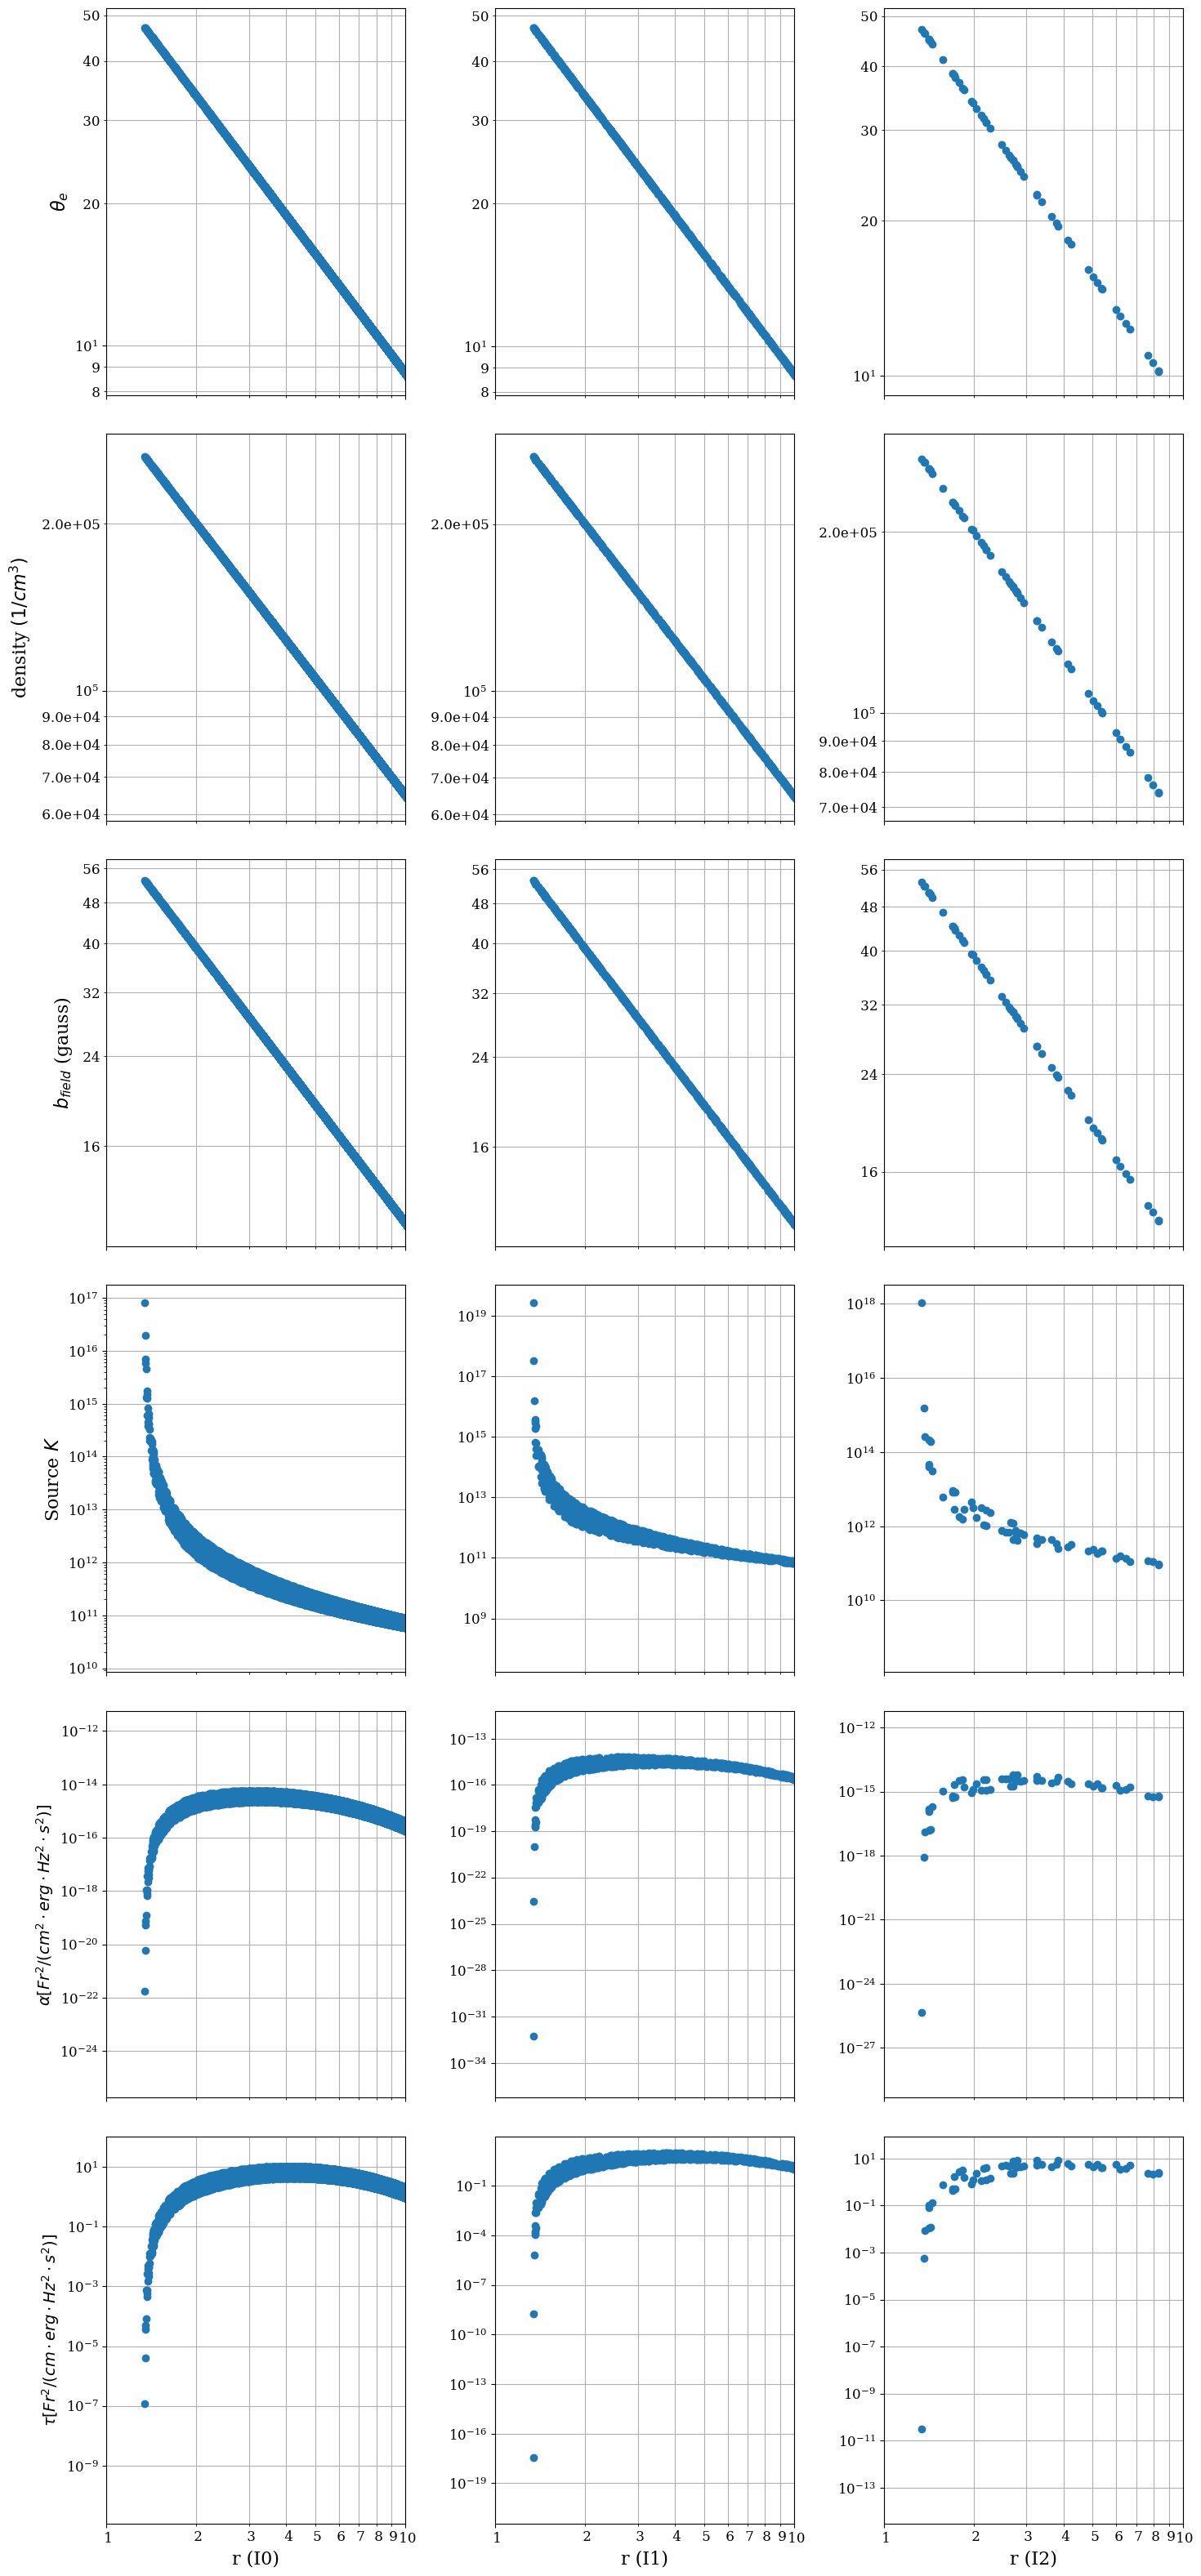

In [18]:


'''

[0,:] ; r
[0,:] ; theta_e
[0,:] ; n
[0,:] ; b_field
[0,:] ; b_nu
[0,:] ; absorptionCoeff
[0,:] ; tau_curv

'''
fig= plt.subplots(6,3,figsize=[17,40], sharex='col')
axs = [
    None, None, None, None, None, None, # Column 1
    None, None, None, None, None, None, # Column 2
    None, None, None, None, None, None  # Colum 3
      ]

line = [
    None, None, None, None, None, None, # Column 1
    None, None, None, None, None, None, # Column 2
    None, None, None, None, None, None  # Colum 3
      ]

b = 1
c = 0
xmin=1
xmax=10
for i in range(1,len(axs),3):
    axs[c] = plt.subplot(6,3,i)
    line[c], = axs[c].plot(full_profiles0[0,:],full_profiles0[b,:], "o")
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim([xmin,xmax])
    plt.grid(True)
    if (c!=3):
        plt.grid(which='minor')
    b = b + 1
    c = c + 1

b = 1
c = 0
for i in range(1,len(axs),3):
    axs[c+6] = plt.subplot(6,3,i+1)
    line[c+6], = axs[c+6].plot(full_profiles1[0,:],full_profiles1[b,:], "o")
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim([xmin,xmax])
    plt.grid()
    plt.grid(which='minor')
    b = b + 1
    c = c + 1


b = 1
c = 0
for i in range(1,len(axs),3):
    axs[c+12] = plt.subplot(6,3,i+2)
    line[c+12], = axs[c+12].plot(full_profiles2[0,:],full_profiles2[b,:], "o")
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim([xmin,xmax])
    plt.grid()
    plt.grid(which='minor')
    b = b + 1
    c = c + 1
    
plt.subplots_adjust(hspace=.1,
                    wspace=.3)

ylabels = [R"$\theta_e$", R"density $(1/cm^3)$", R"$b_{field}$ (gauss)", R"Source $K$",
           R"$\alpha [Fr^2 / (cm^2 \cdot erg \cdot Hz^2 \cdot s^2)]$", R"$\tau [Fr^2 / (cm \cdot erg \cdot Hz^2 \cdot s^2)]$"]
for i in range(len(ylabels)):
    axs[i].set_ylabel(ylabels[i], fontsize=16)
    
axs[4].set_ylabel(ylabels[4], fontsize=14)
axs[5].set_ylabel(ylabels[5], fontsize=14)
    
# xlabeling
axs[5].set_xlabel("r (I0)", fontsize=16)
axs[5].xaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.f'))
axs[5].xaxis.set_minor_formatter(ticker.FormatStrFormatter('% 1.f'))

axs[11].set_xlabel("r (I1)", fontsize=16)
axs[11].xaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.f'))
axs[11].xaxis.set_minor_formatter(ticker.FormatStrFormatter('% 1.f'))

axs[17].set_xlabel("r (I2)", fontsize=16)
axs[17].xaxis.set_major_formatter(ticker.FormatStrFormatter('% 1.f'))
axs[17].xaxis.set_minor_formatter(ticker.FormatStrFormatter('% 1.f'))

# ylabeling
for i in range(0,len(axs), 6):
    # axs[i].set_ylim([line[i].get_ydata().min(),line[i].get_ydata().max()])
    x = line[i].get_xdata()
    y = line[i].get_ydata()
    y = y[np.logical_and(x>=xmin,x<=xmax)]
    
    axs[i].set_ylim([y.min()*.9,y.max()*1.1])
    axs[i].yaxis.set_minor_formatter(ticker.FormatStrFormatter('% 1.f')) 
    
    x = line[i+1].get_xdata()
    y = line[i+1].get_ydata()
    y = y[np.logical_and(x>=xmin,x<=xmax)]
    axs[i+1].set_ylim([y.min()*.9,y.max()*1.1])
    axs[i+1].yaxis.set_minor_formatter(ticker.FormatStrFormatter('% .1e')) 
    
    x = line[i+2].get_xdata()
    y = line[i+2].get_ydata()
    y = y[np.logical_and(x>=xmin,x<=xmax)]
    axs[i+2].set_ylim([y.min()*.9,y.max()*1.1])
    axs[i+2].yaxis.set_minor_formatter(ticker.FormatStrFormatter('% 1.f')) 
    axs[i+2].yaxis.set_minor_locator(plt.MaxNLocator(7))
    

for i in range(0,len(axs), 6):
    # axs[i].set_ylim([line[i].get_ydata().min(),line[i].get_ydata().max()])
    x = line[i+4].get_xdata()
    y = line[i+4].get_ydata()
    y = y[np.logical_and(x>=xmin,x<=xmax)]
    
    axs[i+4].set_ylim([y.min()*10e-5,y.max()*10e2])
    
    x = line[i+5].get_xdata()
    y = line[i+5].get_ydata()
    y = y[np.logical_and(x>=xmin,x<=xmax)]
    
    axs[i+5].set_ylim([y.min()*10e-5,y.max()*1e1])
    
# axs[0].yaxis.set_minor_formatter(ticker.FormatStrFormatter('% 1.f')) 
# 
# axs[6].yaxis.set_minor_locator(plt.MaxNLocator(7))
# axs[6].yaxis.set_minor_formatter(ticker.FormatStrFormatter('% 1.f'))   

# axs[1].yaxis.set_minor_formatter(ticker.FormatStrFormatter('% .1e'))
# axs[2].yaxis.set_minor_formatter(ticker.FormatStrFormatter('% 1.f'))


plt.savefig(
    path_sub + 'images/low_rez/graph_BHImage_a_{}|i_{}|nu_{}|mass_{}|scaleh_{}|thetab_{}|beta_{}|rie_{}|rb_{}|nth0_{}|te0_{}|pdens_{}|ptemp_{}|nscale_{}|emkey_{}|bkey_{}|nkey_{}|tnkey_{}|bnkey_{}.png'.format(
    spin_case,
    i_case,
    "{:.1e}".format(brightparams["nu0"]),
    "{:.1e}".format(brightparams["mass"]), 
    float(brightparams["scale_height"]),
    "{:.3f}".format(brightparams["theta_b"]), 
    "{:.2f}".format(float(brightparams["beta"])),
    "{:.1f}".format(float(brightparams["r_ie"])), 
    "{:.1f}".format(float(brightparams["rb_0"])),
    "{:.1e}".format(brightparams["n_th0"]),
    "{:.1e}".format(brightparams["t_e0"]),
    float(brightparams["p_dens"]),
    float(brightparams["p_temp"]),
    "{:.1f}".format(brightparams["nscale"]),
    funckeys["emodelkey"],
    funckeys["bkey"],
    funckeys["nnoisykey"],
    funckeys["tnoisykey"],
    funckeys["bnoisykey"]
    ), bbox_inches='tight'
)
plt.show()

    

In [193]:
10e-10

1e-09

In [136]:
line[0].get_ydata().min()

3.0113872239234873

In [179]:

x = line[0].get_xdata()
y = line[0].get_ydata()
y[np.logical_and(x>=xmin,x<=xmax)]

array([8.72980783, 8.73690486, 8.74114113, ..., 8.77811579, 8.76256278,
       8.74420767])

In [173]:
test = np.array([1,0,-1])
print(test[np.logical_and(test>-1,test<1)])

[0]


In [164]:
np.where((test>-1) and (test<1))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [170]:
np.logical_and(test>-1,test<1)

array([False,  True, False])

In [168]:
((test.any()>-1) and (test.any()<1))

False

In [45]:
for i in range(len(full_profiles_unit)):
    print(full_profiles_unit[i])


1 / cm3
g(1/2) / (cm(1/2) s)
K
Fr2 / (cm2 erg Hz2 s2)
Fr2 / (cm erg Hz2 s2)


# G function tests

In [12]:
# Assume d log is natural log, & is for end of line
gxvalsarray = np.array([1.e-6, 1.12202e-6, 1.25893e-6, 1.41254e-6, 1.58489e-6, 1.77828e-6, 1.99526e-6, 2.23872e-6, 2.51189e-6,2.81838e-6, 3.16228e-6, 3.54813e-6, 3.98107e-6, 
              4.46684e-6, 5.01187e-6, 5.62341e-6, 6.30957e-6, 7.07946e-6, 7.94328e-6, 8.91251e-6, 0.00001e0, 0.0000112202e0, 0.0000125893e0, 0.0000141254e0,
              0.0000158489e0, 0.0000177828e0, 0.0000199526e0, 0.0000223872e0, 0.0000251189e0, 0.0000281838e0, 0.0000316228e0, 0.0000354813e0, 0.0000398107e0,
              0.0000446684e0, 0.0000501187e0, 0.0000562341e0, 0.0000630957e0, 0.0000707946e0, 0.0000794328e0, 0.0000891251e0, 0.0001e0, 0.000112202e0, 0.000125893e0, 
              0.000141254e0, 0.000158489e0, 0.000177828e0, 0.000199526e0, 0.000223872e0, 0.000251189e0, 0.000281838e0, 0.000316228e0, 0.000354813e0, 0.000398107e0, 0.000446684e0,
              0.000501187e0, 0.000562341e0, 0.000630957e0, 0.000707946e0, 0.000794328e0, 0.000891251e0, 0.001e0, 0.00112202e0, 0.00125893e0, 0.00141254e0, 
              0.00158489e0, 0.00177828e0, 0.00199526e0, 0.00223872e0, 0.00251189e0, 0.00281838e0, 0.00316228e0, 0.00354813e0, 0.00398107e0, 0.00446684e0, 0.00501187e0,
              0.00562341e0, 0.00630957e0, 0.00707946e0, 0.00794328e0, 0.00891251e0, 0.01e0, 0.0112202e0, 0.0125893e0, 0.0141254e0, 0.0158489e0, 0.0177828e0,
              0.0199526e0, 0.0223872e0, 0.0251189e0, 0.0281838e0, 0.0316228e0, 0.0354813e0, 0.0398107e0, 0.0446684e0, 0.0501187e0, 0.0562341e0, 0.0630957e0, 0.0707946e0,
              0.0794328e0, 0.0891251e0, 0.1e0, 0.112202e0, 0.125893e0, 0.141254e0, 0.158489e0, 0.177828e0, 0.199526e0, 0.223872e0, 0.251189e0, 0.281838e0, 0.316228e0, 0.354813e0, 0.398107e0, 0.446684e0,
              0.501187e0, 0.562341e0, 0.630957e0, 0.707946e0, 0.794328e0, 0.891251e0, 1e0, 1.12202e0, 1.25893e0, 1.41254e0, 1.58489e0, 1.77828e0, 1.99526e0, 2.23872e0, 2.51189e0, 2.81838e0, 
              3.16228e0, 3.54813e0, 3.98107e0, 4.46684e0, 5.01187e0, 5.62341e0, 6.30957e0, 7.07946e0, 7.94328e0, 8.91251e0, 10e0, 11.2202e0, 12.5893e0, 14.1254e0, 15.8489e0, 
              17.7828e0, 19.9526e0, 22.3872e0, 25.1189e0, 28.1838e0, 31.6228e0, 35.4813e0, 39.8107e0, 44.6684e0, 50.1187e0, 56.2341e0, 63.0957e0, 70.7946e0, 79.4328e0, 
              89.1251e0, 100e0, 112.202e0, 125.893e0, 141.254e0, 158.489e0, 177.828e0, 199.526e0, 223.872e0, 251.189e0, 281.838e0, 316.228e0, 354.813e0, 398.107e0, 446.684e0, 
              501.187e0, 562.341e0, 630.957e0, 707.946e0, 794.328e0, 891.251e0, 1000e0])
gxvals=np.log(gxvalsarray)




In [23]:
xvalsarray = np.array([1.e-6, 1.25893e-6, 1.58489e-6, 1.99526e-6, 2.51189e-6,3.16228e-6, 3.98107e-6, 5.01187e-6, 6.30957e-6, 7.94328e-6, 0.00001e0, 0.0000125893e0, 0.0000158489e0, 0.0000199526e0,
          0.0000251189e0, 0.0000316228e0, 0.0000398107e0, 0.0000501187e0, 0.0000630957e0, 0.0000794328e0, 0.0001e0, 0.000125893e0, 0.000158489e0, 0.000199526e0, 
          0.000251189e0, 0.000316228e0, 0.000398107e0, 0.000501187e0, 0.000630957e0, 0.000794328e0, 0.001e0, 0.00125893e0, 0.00158489e0, 0.00199526e0, 0.00251189e0, 
          0.00316228e0, 0.00398107e0, 0.00501187e0, 0.00630957e0, 0.00794328e0, 0.01e0, 0.0125893e0, 0.0158489e0, 0.0199526e0, 0.0251189e0, 0.0316228e0, 0.0398107e0, 
          0.0501187e0, 0.0630957e0, 0.0794328e0, 0.1e0, 0.125893e0, 0.158489e0, 0.199526e0, 0.251189e0, 0.316228e0, 0.398107e0, 0.501187e0, 0.630957e0, 0.794328e0, 1e0, 
          1.25893e0, 1.58489e0, 1.99526e0, 2.51189e0, 3.16228e0, 3.98107e0, 5.01187e0, 6.30957e0, 7.94328e0, 10e0, 12.5893e0, 15.8489e0, 19.9526e0, 25.1189e0, 31.6228e0, 
          39.8107e0, 50.1187e0, 63.0957e0, 79.4328e0, 100e0])
xvals=np.log(xvalsarray)

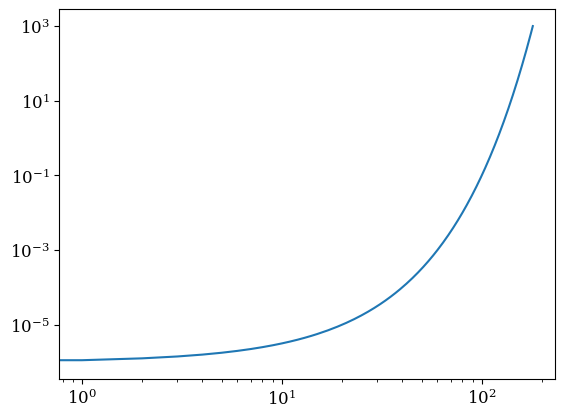

In [25]:
plt.plot(gxvalsarray)
plt.xscale('log')
plt.yscale('log')

In [2]:
"{:.3e}".format(230e9)

'2.300e+11'